## Imports

In [206]:
# General Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle
import os

#from eda import * # A MODIFIER CAR PAS PEP8 ET YA DES TRUCS QUI MARCHENT PAS

from numpy import radians, cos, sin, sqrt
from numpy import arcsin as asin

# Folium
#!pip install folium
import folium
from folium.plugins import HeatMap

# Dates
import datetime as dt
from datetime import timedelta

# KNN imputer
from sklearn.impute import KNNImputer

# Outliers
from sklearn.ensemble import IsolationForest

# Preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# PCA
from sklearn.decomposition import PCA
from matplotlib.patches import Circle
from matplotlib.patches import Ellipse

# Warnings
import warnings
warnings.simplefilter(action = 'ignore')

# Sommaire
#!pip install jyquickhelper
from jyquickhelper import add_notebook_menu # attention, ne prend que les titres de niveau 2
add_notebook_menu()

In [207]:
# Set display preferences
pd.set_option('display.max_row', 250)
pd.set_option('display.max_column', 100)
pd.set_option('display.precision', 5)

In [208]:
# si google colab :
#from google.colab import drive
#drive.mount('/content/drive')

In [209]:
# Chemin d'accès aux données (à modifier si code en local)
#path = '/content/drive/MyDrive/OpenClassrooms/Projet5/' #-> pour colab
path = '' #-> en local

# Load datasets
df_customers = pd.read_csv(os.path.join(path, 'data/olist_customers_dataset.csv'))
df_geolocation = pd.read_csv(os.path.join(path, 'data/olist_geolocation_dataset.csv'))
df_order_items = pd.read_csv(os.path.join(path, 'data/olist_order_items_dataset.csv'))
df_order_payments = pd.read_csv(os.path.join(path, 'data/olist_order_payments_dataset.csv'))
df_order_reviews = pd.read_csv(os.path.join(path, 'data/olist_order_reviews_dataset.csv'))
df_orders = pd.read_csv(os.path.join(path, 'data/olist_orders_dataset.csv'))
df_products = pd.read_csv(os.path.join(path, 'data/olist_products_dataset.csv'))
df_sellers = pd.read_csv(os.path.join(path, 'data/olist_sellers_dataset.csv'))
df_product_category = pd.read_csv(os.path.join(path, 'data/product_category_name_translation.csv'))

## Exploration de chaque dataset

### 1 - Customers dataset

In [210]:
# This dataset has information about the customer and its location. Use it to identify unique customers in the
# orders dataset and to find the orders delivery location.

# same customer will get different ids for different orders

In [211]:
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [212]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [213]:
# customer_id -> key to the orders dataset
# customer_unique_id -> unique identifier of a customer
# customer_zip_code_prefix -> 5 digits customer zop code
# customer_city -> customer city name
# customer_state -> customer state

In [214]:
df_customers['customer_zip_code_prefix'].nunique()

14994

Text(0, 0.5, 'Nombre de clients')

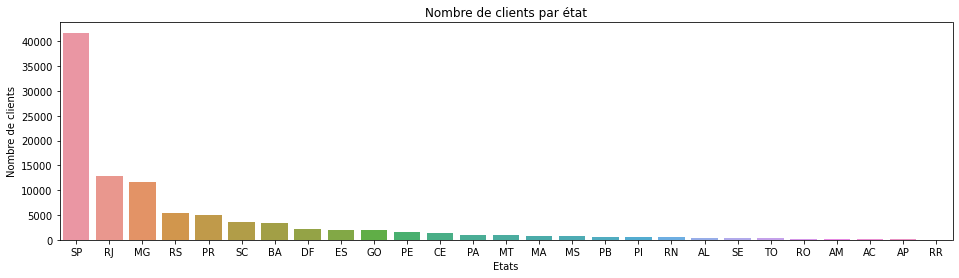

In [215]:
# Visualisation du nombre de clients par état

plt.figure(figsize = (16, 4))
plt.title('Nombre de clients par état')
sns.barplot(y = df_customers['customer_state'].value_counts(),
            x = df_customers['customer_state'].value_counts().index)
plt.xlabel('Etats')
plt.ylabel('Nombre de clients')

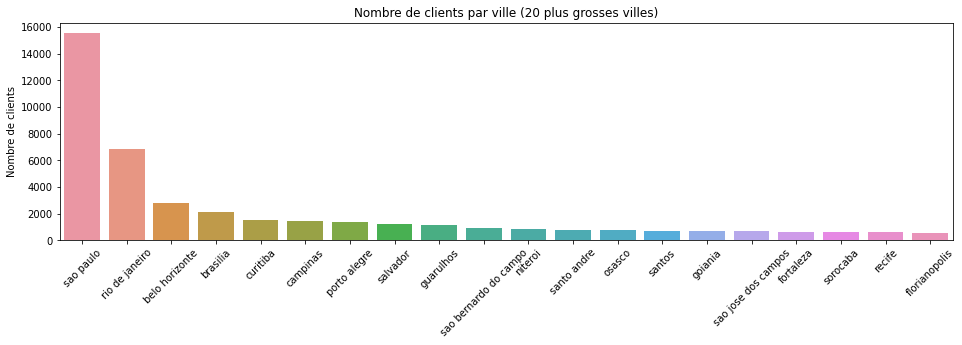

In [216]:
plt.figure(figsize = (16, 4))
plt.title('Nombre de clients par ville (20 plus grosses villes)')
sns.barplot(x = df_customers['customer_city'].value_counts().index[:20],
            y = df_customers['customer_city'].value_counts()[:20])
plt.ylabel('Nombre de clients')
plt.xticks(rotation = 45)
plt.show()

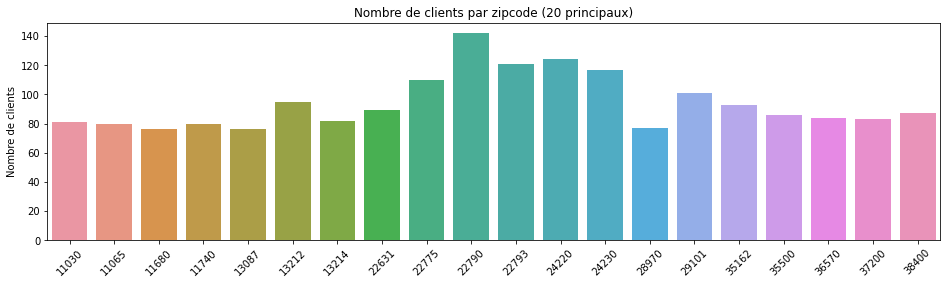

In [217]:
plt.figure(figsize = (16, 4))
plt.title('Nombre de clients par zipcode (20 principaux)')
sns.barplot(x = df_customers['customer_zip_code_prefix'].value_counts().index[:20],
            y = df_customers['customer_zip_code_prefix'].value_counts()[:20])
plt.ylabel('Nombre de clients')
plt.xticks(rotation = 45)
plt.show()

In [218]:
# majorité des clients à SP (São Paulo)

# faire un encodage du type : SP -> 0, les autres villes -> 1 ?

### 2 - Geolocation dataset

In [219]:
# This dataset has information Brazilian zip codes and its lat/lng coordinates. Use it to plot maps and find
# distances between sellers and customers

# -> Données géographiques

In [220]:
# Aperçu des données
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.54562,-46.63929,sao paulo,SP
1,1046,-23.54608,-46.64482,sao paulo,SP
2,1046,-23.54613,-46.64295,sao paulo,SP
3,1041,-23.54439,-46.63950,sao paulo,SP
4,1035,-23.54158,-46.64161,sao paulo,SP


In [221]:
# -> faire moyenne ou barycentre pour avoir un ensemble de coordonnées par ville/code/etat

In [222]:
# Structure des données
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [223]:
########## Visualisation des données - Carte Folium ##########

# Map folium
brazil_coordinates = (-14.2400732, -53.1805017) # coordonnées prises sur wikipedia

# Generating the data that will be given to the heatmap
heat_data = [[row["geolocation_lat"], row["geolocation_lng"]] for index, row in df_geolocation.iterrows()]

# Creating the base map
base_map = folium.Map(location = brazil_coordinates, zoom_start = 2)

# Adding the heatmap layer
HeatMap(data = heat_data, radius = 8, max_zoom = 13).add_to(base_map)

# Displaying the map
# base_map

In [224]:
# -> attention, quelques outliers - la plupart des points sont au Brésil mais certains sont dans d'autres pays.

In [225]:
########## OUTLIERS ##########

# -> supprimer outliers pour ne garder que les points situés au Brésil

# Nord (lat)
df_geolocation = df_geolocation[df_geolocation.geolocation_lat <= 5.27438888] # lat max du Brésil au Nord
# Sud (lat)
df_geolocation = df_geolocation[df_geolocation.geolocation_lat >= -33.75116944] # lat min du Brésil au Sud

# Ouest (long)
df_geolocation = df_geolocation[df_geolocation.geolocation_lng >= -73.98283055] # long max du Brésil à l'Ouest
# Est (long)
df_geolocation = df_geolocation[df_geolocation.geolocation_lng <= -34.79314722] # long max du Brésil à l'Est

In [226]:
# Nombre de régions, villes, codes postaux représenté(e)s dans le jeu de données :
state_unique = df_geolocation['geolocation_state'].nunique()
city_unique = df_geolocation['geolocation_city'].nunique()
zip_unique = df_geolocation['geolocation_zip_code_prefix'].nunique()

print(f'Nombre de régions : {state_unique}')
print(f'Nombre de villes : {city_unique}')
print(f'Nombre de zip code : {zip_unique}')

Nombre de régions : 27
Nombre de villes : 8006
Nombre de zip code : 19010


In [227]:
# Principaux états :
df_geolocation['geolocation_state'].value_counts()[:5]

SP    404267
MG    126334
RJ    121164
RS     61847
PR     57856
Name: geolocation_state, dtype: int64

<Figure size 432x288 with 0 Axes>

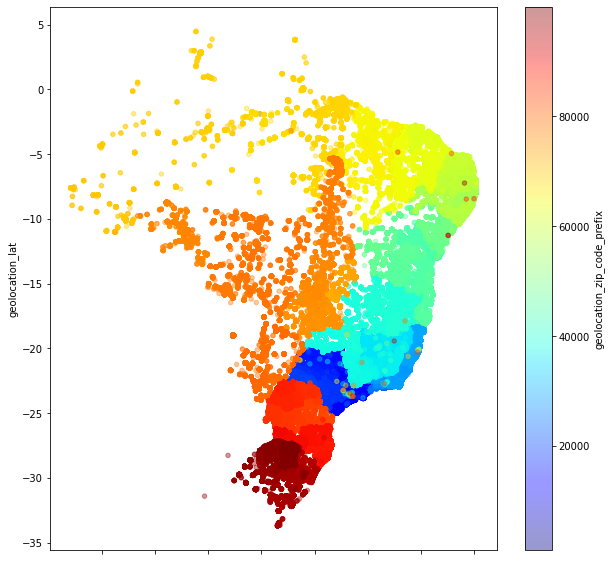

In [228]:
# Visualisation graphique des données géo (latitudes et longitudes) en fonction du code postal associé :

plt.figure()
df_geolocation.plot(kind = 'scatter',
                    x = 'geolocation_lng',
                    y = 'geolocation_lat',
                    alpha = 0.4,
                    c = 'geolocation_zip_code_prefix',
                    cmap = plt.get_cmap('jet'),
                    colorbar = True,
                    figsize = (10, 10))
plt.show()

In [229]:
# quelques points qui ont le mauvais zipcode par rapport aux coordonnées...
# to do -> essayer de les supprimée ? ou des les rectifier ?

# encore quelques points un peu éloignés au Nord -> vérifier coordonnées du Brésil
# - update -> c'est bon, les points au Nord sont bien situés au Brésil - état du Nord semble donc moins réprésenté dans les données

In [230]:
########## DUPLICATS ##########

# nombre de duplicats dans le jeu de données
print(f'Nombre de duplicats dans le jeu de données geolocation avant processing: {df_geolocation.duplicated().sum()}')

# supprimer duplicats
print('****** Suppression des duplicats en cours ******')
df_geolocation = df_geolocation.drop_duplicates()

# nombre de duplicats dans le jeu de données après processing
print(f'Nombre de duplicats dans le jeu de données geolocation après processing: {df_geolocation.duplicated().sum()}')

Nombre de duplicats dans le jeu de données geolocation avant processing: 261822
****** Suppression des duplicats en cours ******
Nombre de duplicats dans le jeu de données geolocation après processing: 0


In [231]:
df_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.54562,-46.63929,sao paulo,SP
1,1046,-23.54608,-46.64482,sao paulo,SP
2,1046,-23.54613,-46.64295,sao paulo,SP
3,1041,-23.54439,-46.63950,sao paulo,SP
4,1035,-23.54158,-46.64161,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.18066,-52.03437,agua santa,RS
1000156,99950,-28.07219,-52.01127,tapejara,RS
1000157,99950,-28.06886,-52.01296,tapejara,RS
1000158,99950,-28.06864,-52.01071,tapejara,RS


In [232]:
df_geolocation.loc[df_geolocation['geolocation_city'] == 'agua santa']

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
999754,99965,-28.17389,-52.03845,agua santa,RS
999755,99965,-28.17843,-52.03526,agua santa,RS
999933,99965,-28.21084,-52.05993,agua santa,RS
999949,99965,-28.18171,-52.03559,agua santa,RS
1000067,99965,-28.17470,-52.03551,agua santa,RS
1000155,99965,-28.18066,-52.03437,agua santa,RS


In [233]:
df_geolocation.loc[df_geolocation['geolocation_city'] == 'sao paulo']

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.54562,-46.63929,sao paulo,SP
1,1046,-23.54608,-46.64482,sao paulo,SP
2,1046,-23.54613,-46.64295,sao paulo,SP
3,1041,-23.54439,-46.63950,sao paulo,SP
4,1035,-23.54158,-46.64161,sao paulo,SP
...,...,...,...,...,...
207050,8450,-23.54767,-46.39002,sao paulo,SP
207052,8450,-23.54707,-46.39109,sao paulo,SP
207053,8473,-23.57269,-46.39424,sao paulo,SP
207054,8411,-23.55594,-46.41391,sao paulo,SP


In [234]:
# plusieurs zip code par ville, mais une seule ville par zipcode

In [235]:
# attention -> plusieurs orthographes pour les villes
df_geolocation['geolocation_city'].value_counts()

sao paulo            79927
rio de janeiro       35177
são paulo            19718
belo horizonte       19474
curitiba             11263
                     ...  
são joão do oeste        1
mondaí                   1
tunápolis                1
vertente do lerio        1
araçagi                  1
Name: geolocation_city, Length: 8006, dtype: int64

In [236]:
# exemple: sao paulo & são paulo
# supprimer les accents pour être tranquille :

df_geolocation['geolocation_city'] = df_geolocation['geolocation_city'].str.normalize('NFKD').str.encode('ascii', errors = 'ignore').str.decode('utf-8')
df_geolocation['geolocation_city'].value_counts()

sao paulo         99646
rio de janeiro    35177
belo horizonte    19474
curitiba          11263
brasilia           8791
                  ...  
paqueta               1
tabai                 1
martinesia            1
tapuirama             1
silvano               1
Name: geolocation_city, Length: 5964, dtype: int64

In [237]:
# regarder nombre de zip code par ville et nb de villes par états (genre de heatmap avec cercles)

# MOCHE - A REFAIRE et surtout très long
"""
df_geolocation.plot(kind = 'scatter',
                    x = 'geolocation_lng',
                    y = 'geolocation_lat',
                    alpha = 0.4,
                    s = df_geolocation['geolocation_zip_code_prefix'],
                    label = 'geolocation_zip_code_prefix',
                    #c = df_geolocation['geolocation_city'],
                    cmap = plt.get_cmap('jet'),
                    colorbar = True,
                    figsize = (12, 8))
plt.show()"""

"\ndf_geolocation.plot(kind = 'scatter',\n                    x = 'geolocation_lng',\n                    y = 'geolocation_lat',\n                    alpha = 0.4,\n                    s = df_geolocation['geolocation_zip_code_prefix'],\n                    label = 'geolocation_zip_code_prefix',\n                    #c = df_geolocation['geolocation_city'],\n                    cmap = plt.get_cmap('jet'),\n                    colorbar = True,\n                    figsize = (12, 8))\nplt.show()"

In [238]:
# Granularité du jeu de données : state > city > zip code

In [239]:
df_geolocation.loc[df_geolocation['geolocation_zip_code_prefix'] == 1037]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.54562,-46.63929,sao paulo,SP
14,1037,-23.54519,-46.63786,sao paulo,SP
31,1037,-23.54670,-46.64034,sao paulo,SP
169,1037,-23.54388,-46.63807,sao paulo,SP
178,1037,-23.54616,-46.63989,sao paulo,SP
236,1037,-23.54388,-46.63807,sao paulo,SP
283,1037,-23.54520,-46.63792,sao paulo,SP
417,1037,-23.54519,-46.63786,sao paulo,SP
420,1037,-23.54672,-46.64028,sao paulo,SP
433,1037,-23.54646,-46.64015,sao paulo,SP


In [240]:
df_geolocation['geolocation_lat'].loc[df_geolocation['geolocation_zip_code_prefix'] == 1037]

0      -23.54562
14     -23.54519
31     -23.54670
169    -23.54388
178    -23.54616
236    -23.54388
283    -23.54520
417    -23.54519
420    -23.54672
433    -23.54646
533    -23.54581
677    -23.54587
700    -23.54434
724    -23.54314
781    -23.54314
874    -23.54493
956    -23.54609
1017   -23.54670
1216   -23.54634
Name: geolocation_lat, dtype: float64

In [241]:
df_geolocation['geolocation_lat'].loc[df_geolocation['geolocation_zip_code_prefix'] == 1037].mean()

-23.54533514931352

In [242]:
df_geolocation['geolocation_lng'].loc[df_geolocation['geolocation_zip_code_prefix'] == 1037]

0      -46.63929
14     -46.63786
31     -46.64034
169    -46.63807
178    -46.63989
236    -46.63807
283    -46.63792
417    -46.63786
420    -46.64028
433    -46.64015
533    -46.63960
677    -46.63969
700    -46.63835
724    -46.63761
781    -46.63761
874    -46.63829
956    -46.63976
1017   -46.64034
1216   -46.63996
Name: geolocation_lng, dtype: float64

In [243]:
df_geolocation['geolocation_lng'].loc[df_geolocation['geolocation_zip_code_prefix'] == 1037].mean()

-46.63899521271492

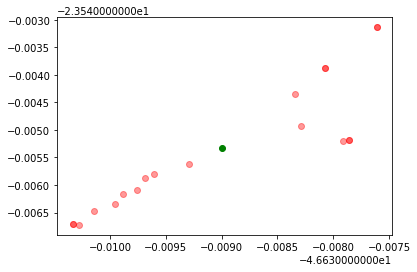

In [244]:
# test en remplaçant coordonnées par moyenne
x_zip = df_geolocation['geolocation_lng'].loc[df_geolocation['geolocation_zip_code_prefix'] == 1037]
y_zip = df_geolocation['geolocation_lat'].loc[df_geolocation['geolocation_zip_code_prefix'] == 1037]

# Visualisation graphique des zip_code_prefix, des latitudes et longitudes associées
plt.figure()
plt.scatter(x = x_zip, y = y_zip, alpha = 0.4, c = 'red') # points
plt.scatter(x = x_zip.mean(), y = y_zip.mean(), c = 'green') # moyenne
plt.show()

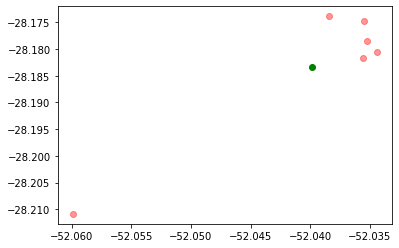

In [245]:
# test avec un autre zip code
x_zip = df_geolocation['geolocation_lng'].loc[df_geolocation['geolocation_zip_code_prefix'] == 99965]
y_zip = df_geolocation['geolocation_lat'].loc[df_geolocation['geolocation_zip_code_prefix'] == 99965]

plt.figure()
plt.scatter(x = x_zip,
            y = y_zip,
            alpha = 0.4,
            c = 'red')
plt.scatter(x = x_zip.mean(),
            y = y_zip.mean(),
            c = 'green')
plt.show()

In [246]:
# impossible de merger geoloc aux autres df (sellers et customers) car plusieurs coordonnées par zip code/villes...
# pas la même granularité entre les df donc besoin de merger

In [247]:
df_geolocation.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [248]:
# groupby et remplacer par mean
df_geo = df_geolocation.groupby(['geolocation_zip_code_prefix'], as_index = False).agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean',
    'geolocation_city': 'first',
    'geolocation_state' :'first'
})

<Figure size 432x288 with 0 Axes>

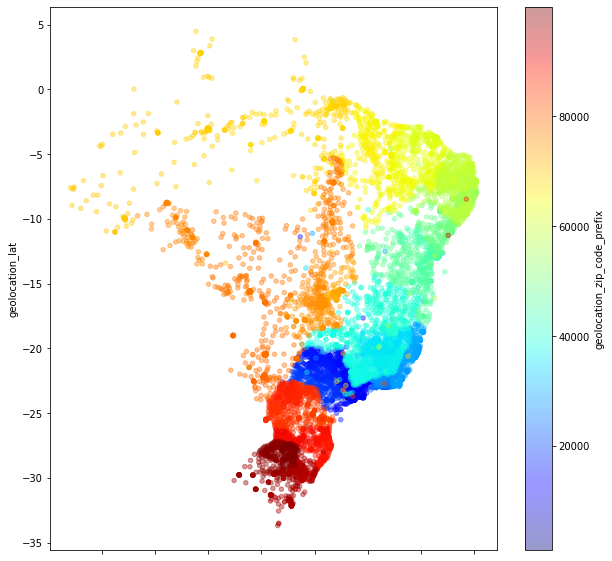

In [249]:
plt.figure()
df_geo.plot(kind = 'scatter',
            x = 'geolocation_lng',
            y = 'geolocation_lat',
            alpha = 0.4,
            c = 'geolocation_zip_code_prefix',
            cmap = plt.get_cmap('jet'),
            colorbar = True,
            figsize = (10, 10))
plt.show()

### 3 - Order items dataset

In [250]:
# This dataset includes data about the items purchased within each order.

df_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [251]:
# order_id -> order unique id
# order_item_id -> nb of items by order
# product_id -> product unique id
# seller_id -> seller unique id
# shipping_limit_date -> shipping limit date (for the seller)
# price -> item price
# freight_value -> item freight value (si plusieurs items par commande, freight value splitté entre les items)

In [252]:
df_order_items['order_item_id'].value_counts()

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: order_item_id, dtype: int64

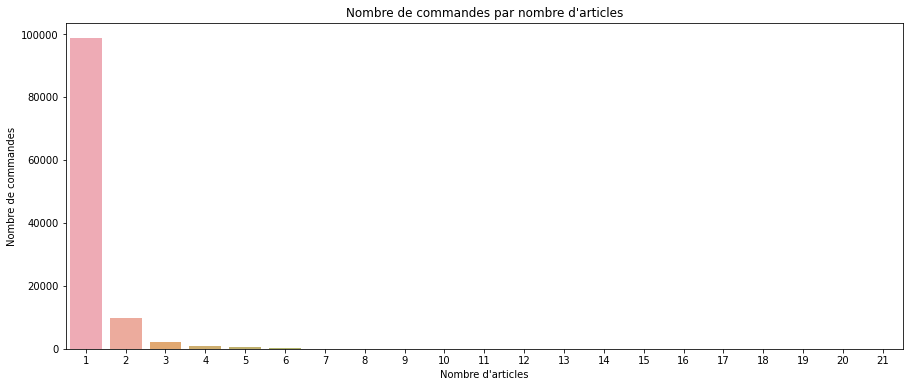

In [253]:
# Nombre d'articles par commande
plt.figure(figsize = (15, 6))
sns.barplot(y = df_order_items['order_item_id'].value_counts(),
            x = df_order_items['order_item_id'].value_counts().index,
            alpha = 0.8)
plt.title("Nombre de commandes par nombre d'articles")
plt.xlabel("Nombre d'articles")
plt.ylabel("Nombre de commandes")
plt.show()

In [254]:
# la plupart des commandes -> 1 seul article

### 4 - Order payments dataset

In [255]:
# This dataset includes data about the orders payment options

# Aperçu des données
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [256]:
# order_id -> unique ID of an order
# payment_sequential -> nb de méthodes de paiement
# payment_type -> méthode de paiement
# payment_installments -> nb of installments chosen by the customer (paiement en plusieurs fois)
# payment_value -> transaction value

In [257]:
df_order_payments['payment_sequential'].value_counts()[:5]

1    99360
2     3039
3      581
4      278
5      170
Name: payment_sequential, dtype: int64

In [258]:
# La majorité des paiements se fait en une fois

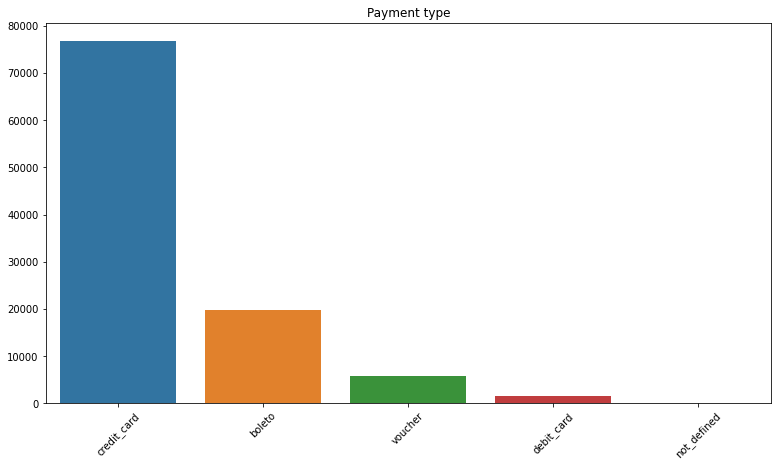

In [259]:
# Type de paiement
order_status = df_order_payments['payment_type'].value_counts()

plt.figure(figsize = (13, 7))
sns.barplot(x = order_status.index, y = order_status.values)
plt.title('Payment type')
plt.xticks(rotation = 45)
plt.show()

In [260]:
# 5 types de paiement différents
# Boleto = moyen de payment en espèce

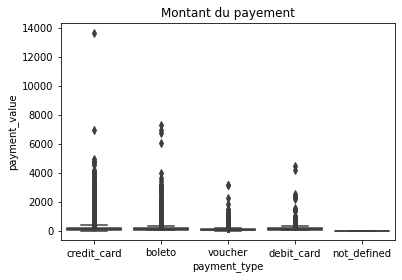

In [261]:
# Boxplot - type de paiement

plt.figure()
sns.boxplot(data = df_order_payments,
            y = 'payment_value',
            x = 'payment_type')
plt.title('Montant du payement')
plt.show()

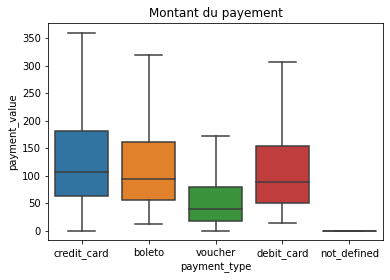

In [262]:
# Boxplot - type de paiement

plt.figure()
sns.boxplot(data = df_order_payments,
            y = 'payment_value',
            x = 'payment_type',
            showfliers = False) # pour enlever les outliers 
plt.title('Montant du payement')
plt.show()

In [263]:
# 'Not defined' -> 3 lignes

display(df_order_payments.loc[df_order_payments['payment_type'] == 'not_defined'])

# à dropper pour simplifier et nettoyer un peu les données
df_order_payments = df_order_payments.loc[df_order_payments['payment_type'] != 'not_defined']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


### 5 - Order reviews dataset

In [264]:
# This dataset includes data about the reviews made by the customers

# Aperçu des données
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [265]:
# review_id -> unique review id
# order_id -> unique order id
# review_score -> de 1 à 5
# review_comment_title -> titre du commentaire (en portugais)
# review_comment_message -> commentaire (en portugais)
# review_creation_date -> date à laquelle le questionnaire de satisfaction a été envoyé au client
# review_answer_timestamp -> date de complétion du questionnaire de satisfaction par le client

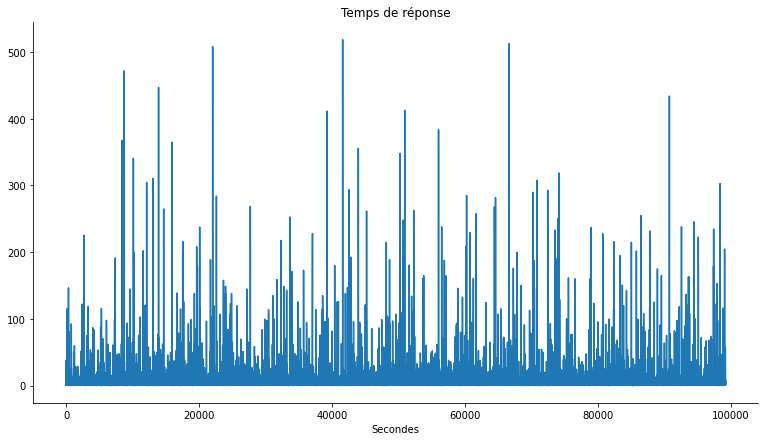

In [266]:
# délai d'évaluation des produits

delay_reponse = (pd.to_datetime(df_order_reviews['review_answer_timestamp']) - pd.to_datetime(df_order_reviews['review_creation_date'])).dt.total_seconds()/(3600*24)
delay_reponse

# Histogramme du délai d'évaluation des produits

plt.figure(figsize = (13, 7))
sns.lineplot(data = delay_reponse) # TO DO -> MOCHE, A ARRANGER
plt.xlabel('Secondes')
plt.title('Temps de réponse')
sns.despine()
plt.show()

In [267]:
# quelques commentaires manquants -> faire variable bool (commentaire présent/absent)
# (cf. section feature engineering plus bas)

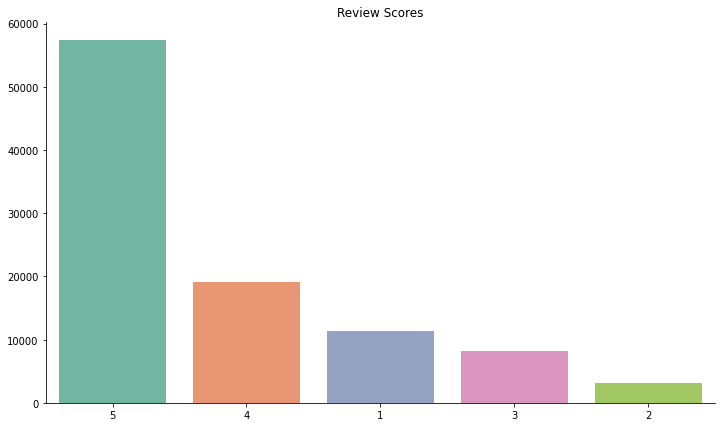

In [268]:
# Distribution des scores de reviews
plt.figure(figsize = (12, 7))
review_score_index = [str(i) for i in df_order_reviews['review_score'].value_counts().index]
sns.barplot(x = review_score_index, y = df_order_reviews['review_score'].value_counts().values, palette = 'Set2')
plt.title('Review Scores')
sns.despine() # Remove the top and right spines from plot(s)
plt.show()

### 6 - Orders dataset

In [269]:
# "Core" dataset

# Aperçu des données
df_orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
21115,f7990eeaa9997867008e68d2a8972953,d13f886225b29a38fab0644a6f29a112,delivered,2018-02-14 11:19:03,2018-02-14 11:35:21,2018-02-15 19:16:48,2018-02-23 00:03:27,2018-03-09 00:00:00
84302,e1b7c817cbe8c84aeaad8a92bc96970c,9734ba42a6232a561918467cef0c6d7f,delivered,2017-08-10 16:08:46,2017-08-10 16:25:08,2017-08-11 20:04:50,2017-08-23 20:17:45,2017-09-05 00:00:00
74862,fb2547a335f4231f46fd7b70e9aee046,1961a41144dc48610f2e2da84b0507fe,delivered,2017-07-03 23:04:06,2017-07-03 23:23:23,2017-07-05 09:56:43,2017-07-06 12:03:50,2017-07-14 00:00:00
75732,a5a6776969179ec8c6942c432d35bf3a,365b271927c18b2fc6711b435b202a9e,delivered,2018-06-17 01:20:47,2018-06-17 01:38:39,2018-06-19 16:32:00,2018-06-22 14:48:38,2018-07-17 00:00:00
6568,b51513f98ab50006e3b2b4a888cdec14,0ec6fdf01517d4e03821ee8f2adeafe9,delivered,2017-07-20 11:39:45,2017-07-20 11:50:25,2017-07-20 17:16:03,2017-07-21 18:49:31,2017-08-02 00:00:00


In [270]:
# order_id -> unique id of the order
# customer_id -> key to the customer dataset
# order_status -> status de la commande
# order_purchase_timestamp -> date d'achat
# order_approved_at -> date d'acceptation du paiment
# order_delivered_carrier_date -> date à laquelle la commande confiée au service de livraison
# order_delivered_customer_date -> date de livraison
# order_estimated_delivery_date -> date de livraison estimée indiquée au client lors de l'achat

In [271]:
# idée -> regarder delta entre date de livraison estimée et effective - regarder correlation avec note review

In [272]:
# manque quelques dates - regarder où

df_orders.loc[df_orders['order_delivered_customer_date'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [273]:
# to do -> voir s'il y a un lien entre ces commandes

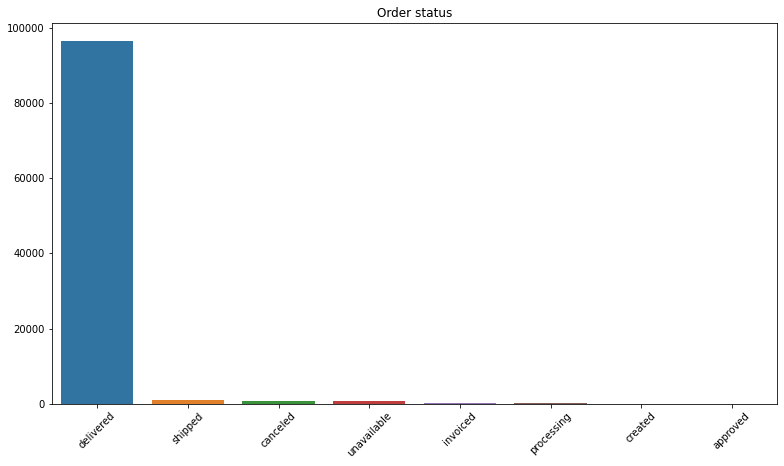

In [274]:
# Nombre de commandes par statuts d'achats
order_status = df_orders['order_status'].value_counts()

# Barplot
plt.figure(figsize = (13, 7))
sns.barplot(x = order_status.index, y = order_status.values)
plt.title('Order status')
plt.xticks(rotation = 45)
plt.show()

In [275]:
# Suppression des commandes 'canceled' ? ou les concerver ?
df_orders = df_orders[df_orders['order_status'] != 'canceled']

# enlever aussi commandes 'created' ?
# autre idée -> ne garder que les commandes livrées ?

### 7 - Products dataset

In [276]:
# This dataset includes data about the products sold by Olist

# Aperçu des données
df_products.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
14544,dab15c80f123fdf15d847ef8e8804f33,utilidades_domesticas,42.0,549.0,2.0,250.0,33.0,5.0,20.0
26317,67d1a56495104e195338ec9007fcf758,pet_shop,20.0,2153.0,1.0,275.0,8.0,13.0,8.0
11028,710e8b076db06c8e5343a9e23f0e3d83,esporte_lazer,60.0,645.0,2.0,600.0,30.0,20.0,20.0
26758,71b3b750619385c825054d16cd9584d0,moveis_decoracao,37.0,478.0,4.0,4450.0,34.0,6.0,28.0
841,2500fb88ba75d71bd264e88b4da5b44b,telefonia,55.0,370.0,1.0,250.0,16.0,8.0,11.0


In [277]:
# product_id
# product_category_name (en portugais)
# product_name_lenght
# product_description_lenght
# product_photos_qty
# product_weight_g
# product_length_cm
# product_height_cm
# product_width_cm

In [278]:
# combien de catégories de produits ?
df_products['product_category_name'].value_counts() # -> 73 catégories de produits

cama_mesa_banho                                   3029
esporte_lazer                                     2867
moveis_decoracao                                  2657
beleza_saude                                      2444
utilidades_domesticas                             2335
automotivo                                        1900
informatica_acessorios                            1639
brinquedos                                        1411
relogios_presentes                                1329
telefonia                                         1134
bebes                                              919
perfumaria                                         868
papelaria                                          849
fashion_bolsas_e_acessorios                        849
cool_stuff                                         789
ferramentas_jardim                                 753
pet_shop                                           719
eletronicos                                        517
construcao

### 8 - Sellers dataset

In [279]:
# This dataset includes data about the sellers that fulfilled orders made at Olist. Use it to find the seller
# location and to identify which seller fulfilled each product

# Aperçu des données
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [280]:
# seller_id
# seller_zip_code_prefix
# seller_city
# seller_state

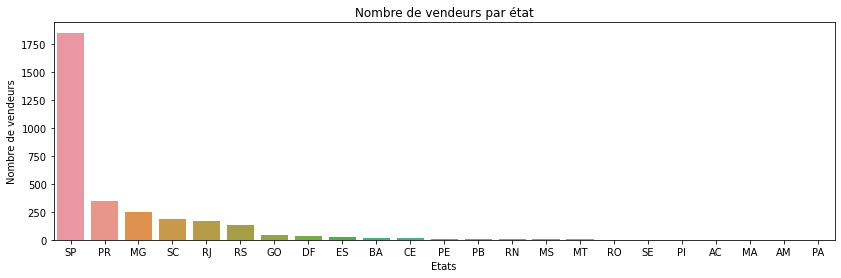

In [281]:
# Visualisation du nombre de vendeurs dans les différents états
plt.figure(figsize = (14, 4))
sns.barplot(y = df_sellers['seller_state'].value_counts(),
            x = df_sellers['seller_state'].value_counts().index)
plt.title('Nombre de vendeurs par état')
plt.xlabel('Etats')
plt.ylabel('Nombre de vendeurs')
plt.show()

In [282]:
# grande majorité des vendeurs sont à SP (São Paulo)

### 9 - Product category name translation

In [283]:
# Translates the product_category_name to english

# Aperçu des données
df_product_category.sample(5)

,product_category_name,product_category_name_english
53,pcs,computers
9,relogios_presentes,watches_gifts
30,moveis_escritorio,office_furniture
2,automotivo,auto
65,dvds_blu_ray,dvds_blu_ray


In [284]:
# Données manquantes
df_product_category.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

## Liens entre datasets

## Merge

In [285]:
# utiliser le dataset orders et merger les autres datasets dessus

# Datasets :
#df_customers
#df_geolocation
#df_order_items
#df_order_payments
#df_order_reviews
#df_orders
#df_products
#df_sellers
#df_product_category

In [286]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [287]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [288]:
# 1 - merge sellers avec coordonnées geo

# renommer colonnes df sellers pour faciliter merge
df_sellers.columns = ['seller_id', 'geolocation_zip_code_prefix', 'seller_city', 'seller_state']

# merge
df_sellers_geo = pd.merge(df_sellers,
                          df_geo,
                          how = 'left',
                          on = ['geolocation_zip_code_prefix', 'geolocation_zip_code_prefix'])

# Suppression de la colonne 'geolocation_zip_code_prefix'
df_sellers_geo.drop(columns = ['geolocation_zip_code_prefix',
                               'geolocation_city',
                               'geolocation_state'
                              ], inplace = True)

# renommer colonnes
df_sellers_geo.columns = ['seller_id', 'seller_city', 'seller_state', 'seller_geolocation_lat', 'seller_geolocation_lng']

df_sellers_geo.sample(5)

,seller_id,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng
2303,6219ba2359cfb97f2e38fd4c321eb309,sao paulo,SP,-23.51856,-46.59569
1496,2c9e548be18521d1c43cde1c582c6de8,mogi das cruzes,SP,-23.54153,-46.26215
1870,b2bdc5e7940a7d7ca8c4a37953b27a42,vargem grande do sul,SP,-21.83524,-46.89933
2557,c6218512d16fcac0af02fe92691cf274,contagem,MG,-19.94115,-44.04168
1650,458d868c9642f55f18f04e951a3fdde6,porto alegre,RS,-30.04894,-51.18885


In [289]:
# 2 - merge sellers avec order items

nb_sellers = df_sellers_geo['seller_id'].nunique()
print(f'Nombre de sellers avant merge : {nb_sellers}')

nb_sellers_items = df_order_items['seller_id'].nunique()
print(f'Nombre de sellers dans items avant merge : {nb_sellers_items}')

nb_order_items = df_order_items['order_id'].nunique()
print(f'Nombre de commandes dans items avant merge : {nb_order_items}')

sellers_and_items = pd.merge(df_order_items,
                             df_sellers_geo,
                             how = 'left',
                             left_on = ['seller_id'],
                             right_on = ['seller_id'])

nb_sellers_final = sellers_and_items['seller_id'].nunique()
print(f'Nombre de sellers après merge : {nb_sellers_final}')
print(f'{nb_sellers - nb_sellers_final} sellers perdus pendant le merge.')
print(f'{nb_sellers_items - nb_sellers_final} sellers items perdus pendant le merge.')

nb_order_final = sellers_and_items['order_id'].nunique()
print(f'Nombre de commandes après merge : {nb_order_final}')
print(f'{nb_order_items - nb_order_final} order perdus pendant le merge.')

sellers_and_items

Nombre de sellers avant merge : 3095
Nombre de sellers dans items avant merge : 3095
Nombre de commandes dans items avant merge : 98666
Nombre de sellers après merge : 3095
0 sellers perdus pendant le merge.
0 sellers items perdus pendant le merge.
Nombre de commandes après merge : 98666
0 order perdus pendant le merge.


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,volta redonda,SP,-22.49719,-44.12732
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,sao paulo,SP,-23.56575,-46.51910
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,borda da mata,MG,-22.26280,-46.17074
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,franca,SP,-20.55365,-47.38715
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,loanda,PR,-22.92958,-53.13575
...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,itajai,SC,-26.91251,-48.67409
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,sao paulo,SP,-23.53584,-46.64285
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,curitiba,PR,-25.46956,-49.28818
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,sao paulo,SP,-23.63770,-46.69555


In [290]:
df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [291]:
# 3 - ajouter infos produits
# merge précédent (sellers_and_items) + df_products

nb_produits = sellers_and_items['product_id'].nunique()
print(f'Nombre de produits dans order items avant merge : {nb_produits}')

nb_produits_df = df_products['product_id'].nunique()
print(f'Nombre de produits dans df produit avant merge : {nb_produits_df}')

nb_order = sellers_and_items['order_id'].nunique()
print(f'Nombre de commandes dans items avant merge : {nb_order}')

sellers_items_products = pd.merge(sellers_and_items,
                                  df_products,
                                  how = 'left',
                                  left_on = ['product_id'],
                                  right_on = ['product_id'])

nb_produits_final = sellers_items_products['product_id'].nunique()
print(f'Nombre de produits après merge : {nb_produits_final}')
print(f'{nb_produits - nb_produits_final} produits perdus pendant le merge.')
print(f'{nb_produits_df - nb_produits_final} infos produits perdus pendant le merge.')

nb_order_final = sellers_items_products['order_id'].nunique()
print(f'Nombre de commandes après merge : {nb_order_final}')
print(f'{nb_order - nb_order_final} order perdus pendant le merge.')

sellers_items_products

Nombre de produits dans order items avant merge : 32951
Nombre de produits dans df produit avant merge : 32951
Nombre de commandes dans items avant merge : 98666
Nombre de produits après merge : 32951
0 produits perdus pendant le merge.
0 infos produits perdus pendant le merge.
Nombre de commandes après merge : 98666
0 order perdus pendant le merge.


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,volta redonda,SP,-22.49719,-44.12732,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,sao paulo,SP,-23.56575,-46.51910,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,borda da mata,MG,-22.26280,-46.17074,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,franca,SP,-20.55365,-47.38715,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,loanda,PR,-22.92958,-53.13575,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,itajai,SC,-26.91251,-48.67409,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,sao paulo,SP,-23.53584,-46.64285,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,curitiba,PR,-25.46956,-49.28818,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,sao paulo,SP,-23.63770,-46.69555,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [292]:
# 4 - ajouter infos produits aux commandes
# merge précédent (sellers_and_items) + df_products

nb_produits = sellers_items_products['product_id'].nunique()
print(f'Nombre de produits dans order items avant merge : {nb_produits}')

nb_order = sellers_items_products['order_id'].nunique()
print(f'Nombre de commandes dans items avant merge : {nb_order}')

nb_order_df = df_orders['order_id'].nunique()
print(f'Nombre de commandes avant merge : {nb_order_df}')

products_orders = pd.merge(df_orders,
                           sellers_items_products,
                           how = 'left',
                           left_on = ['order_id'],
                           right_on = ['order_id'])

nb_produits_final = products_orders['product_id'].nunique()
print(f'Nombre de produits après merge : {nb_produits_final}')
print(f'{nb_produits - nb_produits_final} produits perdus pendant le merge.')

nb_order_final = products_orders['order_id'].nunique()
print(f'Nombre de commandes après merge : {nb_order_final}')
print(f'{nb_order - nb_order_final} order items perdus pendant le merge.')
print(f'{nb_order_df - nb_order_final} order perdus pendant le merge.')

products_orders

Nombre de produits dans order items avant merge : 32951
Nombre de commandes dans items avant merge : 98666
Nombre de commandes avant merge : 98816
Nombre de produits après merge : 32735
216 produits perdus pendant le merge.
Nombre de commandes après merge : 98816
-150 order items perdus pendant le merge.
0 order perdus pendant le merge.


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,maua,SP,-23.68086,-46.44431,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,belo horizonte,SP,-19.80788,-43.98082,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,guariba,SP,-21.36347,-48.22959,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,belo horizonte,MG,-19.83687,-43.92324,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,mogi das cruzes,SP,-23.54153,-46.26215,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112714,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,tupa,SP,-21.93046,-50.49806,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0
112715,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,sao paulo,SP,-23.55395,-46.45326,eletrodomesticos_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0
112716,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,ilicinea,MG,-20.94071,-45.82720,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0
112717,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,ilicinea,MG,-20.94071,-45.82720,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0


In [293]:
# 5 - ajouter infos payment aux commandes
# merge précédent (products_orders) + df_order_payments

nb_order = products_orders['order_id'].nunique()
print(f'Nombre de commandes dans order avant merge : {nb_order}')

nb_order_df = df_order_payments['order_id'].nunique()
print(f'Nombre de payments commandes avant merge : {nb_order_df}')

products_orders_payment = pd.merge(products_orders,
                           df_order_payments,
                           how = 'left',
                           left_on = ['order_id'],
                           right_on = ['order_id'])

nb_order_final = products_orders_payment['order_id'].nunique()
print(f'Nombre de commandes après merge : {nb_order_final}')
print(f'{nb_order - nb_order_final} order perdus pendant le merge.')
print(f'{nb_order_df - nb_order_final} order payments perdus pendant le merge.')

products_orders_payment

Nombre de commandes dans order avant merge : 98816
Nombre de payments commandes avant merge : 99437
Nombre de commandes après merge : 98816
0 order perdus pendant le merge.
621 order payments perdus pendant le merge.


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,maua,SP,-23.68086,-46.44431,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,maua,SP,-23.68086,-46.44431,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,maua,SP,-23.68086,-46.44431,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,belo horizonte,SP,-19.80788,-43.98082,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,guariba,SP,-21.36347,-48.22959,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,1.0,credit_card,3.0,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117684,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,tupa,SP,-21.93046,-50.49806,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,1.0,credit_card,3.0,195.00
117685,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,sao paulo,SP,-23.55395,-46.45326,eletrodomesticos_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,1.0,credit_card,5.0,271.01
117686,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,ilicinea,MG,-20.94071,-45.82720,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,1.0,credit_card,4.0,441.16
117687,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2.0,d1c427060a0f73f6b889a5c

In [294]:
# 6 - ajouter infos reviews aux commandes
# merge précédent (products_orders_payment) + df_order_reviews

nb_order = products_orders_payment['order_id'].nunique()
print(f'Nombre de commandes dans order avant merge : {nb_order}')

nb_order_df = df_order_reviews['order_id'].nunique()
print(f'Nombre de reviews commandes avant merge : {nb_order_df}')

products_orders_payment_reviews = pd.merge(products_orders_payment,
                           df_order_reviews,
                           how = 'left',
                           left_on = ['order_id'],
                           right_on = ['order_id'])

nb_order_final = products_orders_payment_reviews['order_id'].nunique()
print(f'Nombre de commandes après merge : {nb_order_final}')
print(f'{nb_order - nb_order_final} order perdus pendant le merge.')
print(f'{nb_order_df - nb_order_final} order reviews perdus pendant le merge.')

products_orders_payment_reviews

Nombre de commandes dans order avant merge : 98816
Nombre de reviews commandes avant merge : 98673
Nombre de commandes après merge : 98816
0 order perdus pendant le merge.
-143 order reviews perdus pendant le merge.


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,maua,SP,-23.68086,-46.44431,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,maua,SP,-23.68086,-46.44431,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,maua,SP,-23.68086,-46.44431,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,belo horizonte,SP,-19.80788,-43.98082,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,guariba,SP,-21.36347,-48.22959,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118388,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,tupa,SP,-21.93046,-50.49806,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,1.0,credit_card,3.0,195.00,29bb71b2760d0f876dfa178a76bc4734,4.0,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01
118389,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:2

In [295]:
df_customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [296]:
df_geo.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [297]:
df_customers.columns = [
    'customer_id', 
    'customer_unique_id', 
    'geolocation_zip_code_prefix',
    'customer_city', 
    'customer_state'
    ]

In [298]:
# 7 - customer + geo
df_customers_geo = pd.merge(df_customers, 
                            df_geo, 
                            how = 'left', 
                            on = ['geolocation_zip_code_prefix', 'geolocation_zip_code_prefix'])

# Suppression de la colonne 'geolocation_zip_code_prefix'
df_customers_geo.drop(columns = ['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'], 
                      inplace = True)
df_customers_geo

,customer_id,customer_unique_id,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,-20.49927,-47.39666
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,-23.72840,-46.54225
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,-23.53131,-46.65669
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,-23.50067,-46.18635
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,-22.97571,-47.14314
...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,sao paulo,SP,-23.58618,-46.49965
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,taboao da serra,SP,-23.61679,-46.76772
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fortaleza,CE,-3.73563,-38.51078
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,canoas,RS,-29.94996,-51.16838


In [299]:
df_customers_geo.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'geolocation_lat', 'geolocation_lng'],
      dtype='object')

In [300]:
# renommer colonnes avant prochain merge
df_customers_geo.columns = [
    'customer_id', 
    'customer_unique_id', 
    'customer_city', 
    'customer_state',
    'customer_geolocation_lat', 
    'customer_geolocation_lng'
    ]

In [301]:
# 8 - lier commandes à leurs clients
# merge précédent (products_orders_payment_reviews) + df_customers

nb_order = products_orders_payment_reviews['order_id'].nunique()
print(f'Nombre de commandes dans order avant merge : {nb_order}')

nb_customer = products_orders_payment_reviews['customer_id'].nunique()
print(f'Nombre de customer dans order avant merge : {nb_order}')

nb_customer_df = df_customers_geo['customer_id'].nunique()
print(f'Nombre de customers avant merge : {nb_order_df}')

df_final = pd.merge(
    df_customers_geo, 
    products_orders_payment_reviews,
    how = 'left',
    left_on = ['customer_id'],
    right_on = ['customer_id']
    )

nb_order_final = df_final['order_id'].nunique()
nb_customer_final = df_final['customer_id'].nunique()
print(f'Nombre de commandes après merge : {nb_order_final}')
print(f'Nombre de customer après merge : {nb_customer_final}')
print(f'{nb_order - nb_order_final} order perdus pendant le merge.')
print(f'{nb_customer - nb_customer_final} customers de order perdus pendant le merge.')
print(f'{nb_customer_df - nb_customer_final} customers perdus pendant le merge.')

df_final

Nombre de commandes dans order avant merge : 98816
Nombre de customer dans order avant merge : 98816
Nombre de customers avant merge : 98673
Nombre de commandes après merge : 98816
Nombre de customer après merge : 99441
0 order perdus pendant le merge.
-625 customers de order perdus pendant le merge.
0 customers perdus pendant le merge.


,customer_id,customer_unique_id,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,-20.49927,-47.39666,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,itaquaquecetuba,SP,-23.48614,-46.36711,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,-23.72840,-46.54225,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,itajai,SC,-26.91251,-48.67409,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,-23.53131,-46.65669,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,itaquaquecetuba,SP,-23.48614,-46.36711,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,-23.50067,-46.18635,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,itaquaquecetuba,SP,-23.48614,-46.36711,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,-22.97571,-47.14314,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,ibitinga,SP,-21.75723,-48.82954,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119013,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,sao paulo,SP,-23.58618,-46.49965,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,1.0,ccb4503d9d4

In [302]:
df_final

,customer_id,customer_unique_id,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,-20.49927,-47.39666,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,itaquaquecetuba,SP,-23.48614,-46.36711,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,-23.72840,-46.54225,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,itajai,SC,-26.91251,-48.67409,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,-23.53131,-46.65669,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,itaquaquecetuba,SP,-23.48614,-46.36711,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,-23.50067,-46.18635,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,itaquaquecetuba,SP,-23.48614,-46.36711,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,-22.97571,-47.14314,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,ibitinga,SP,-21.75723,-48.82954,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119013,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,sao paulo,SP,-23.58618,-46.49965,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,1.0,ccb4503d9d4

In [303]:
df_final.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'customer_geolocation_lat', 'customer_geolocation_lng', 'order_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'seller_city', 'seller_state', 'seller_geolocation_lat',
       'seller_geolocation_lng', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')

## Feature engineering

In [304]:
# identifier potentielles nouvelles variables qui pourraient être interessantes pour la segmentation
# (ne pas en faire trop non plus, modèle doit être explicable quand même)

In [305]:
########## Traduire noms portugais -> anglais ##########

df_final['product_category_name_english'] = df_final['product_category_name'].map(df_product_category.set_index('product_category_name')['product_category_name_english'])
df_final.drop(['product_category_name'], axis = 1, inplace = True)

In [306]:
df_final['product_category_name_english'].unique()

array(['office_furniture', 'housewares', 'home_confort', 'sports_leisure',
       'computers_accessories', nan, 'toys', 'furniture_decor', 'auto',
       'air_conditioning', 'telephony', 'health_beauty', 'garden_tools',
       'pet_shop', 'bed_bath_table', 'baby', 'watches_gifts',
       'kitchen_dining_laundry_garden_furniture', 'perfumery', 'art',
       'stationery', 'fashio_female_clothing', 'consoles_games',
       'construction_tools_lights', 'food_drink', 'drinks', 'cool_stuff',
       'fashion_bags_accessories', 'home_construction',
       'luggage_accessories', 'electronics', 'home_appliances_2',
       'fashion_male_clothing', 'small_appliances',
       'small_appliances_home_oven_and_coffee', 'books_general_interest',
       'home_appliances', 'costruction_tools_tools',
       'signaling_and_security', 'musical_instruments',
       'construction_tools_construction', 'music', 'fashion_shoes',
       'industry_commerce_and_business', 'fashion_underwear_beach',
       'dvds_blu

In [307]:
# Faire nouvelles catégories -> + de 70 actuellement, impossible à utiliser

categories = {
    'Furniture': ['office_furniture', 'furniture_decor', 'furniture_living_room', 'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'home_comfort', 'home_comfort_2', 'home_construction', 'garden_tools', 'furniture_bedroom', 'furniture_mattress_and_upholstery'],
    'Electronics': ['auto', 'computers_accessories', 'musical_instruments', 'consoles_games', 'watches_gifts', 'air_conditioning', 'telephony', 'electronics', 'fixed_telephony', 'tablets_printing_image', 'computers', 'small_appliances_home_oven_and_coffee', 'small_appliances', 'audio', 'signaling_and_security', 'security_and_services'],
    'Fashion': ['fashio_female_clothing', 'fashion_male_clothing', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 'baby', 'cool_stuff'],
    'Home & Garden': ['housewares', 'home_confort', 'home_appliances', 'home_appliances_2', 'flowers', 'costruction_tools_garden', 'garden_tools', 'construction_tools_lights', 'costruction_tools_tools', 'luggage_accessories', 'la_cuisine', 'pet_shop', 'market_place'],
    'Entertainment': ['sports_leisure', 'toys', 'cds_dvds_musicals', 'music', 'dvds_blu_ray', 'cine_photo', 'party_supplies', 'christmas_supplies', 'arts_and_craftmanship', 'art', 'books_general_interest', 'books_technical', 'books_imported', 'stationery'],
    'Beauty & Health': ['health_beauty', 'perfumery', 'diapers_and_hygiene'],
    'Food & Drinks': ['food_drink', 'drinks', 'food'],
    'Industry & Construction': ['construction_tools_construction', 'construction_tools_safety', 'industry_commerce_and_business', 'agro_industry_and_commerce']
    }

In [308]:
# Réduire les 8 catégories pour n'en garder que 4 :

categories_4 = {
    'Furniture and Home Decor': [
        'office_furniture', 'housewares', 'furniture_decor',
        'kitchen_dining_laundry_garden_furniture', 'bed_bath_table',
        'luggage_accessories', 'furniture_living_room', 'furniture_bedroom',
        'furniture_mattress_and_upholstery'
    ],
    'Electronics and Technology': [
        'computers_accessories', 'telephony', 'electronics',
        'tablets_printing_image', 'fixed_telephony', 'computers', 'audio'
    ],
    'Fashion and Accessories': [
        'fashion_female_clothing', 'fashion_bags_accessories',
        'fashion_male_clothing', 'fashion_shoes', 'fashion_underwear_beach',
        'fashion_sport', 'fashion_childrens_clothes'
    ],
    'Leisure and Miscellaneous': [
        'sports_leisure', 'toys', 'auto', 'health_beauty', 'garden_tools',
        'pet_shop', 'watches_gifts', 'perfumery', 'art', 'stationery',
        'consoles_games', 'construction_tools_lights', 'food_drink', 'drinks',
        'cool_stuff', 'home_construction', 'electronics', 'home_appliances_2',
        'small_appliances', 'small_appliances_home_oven_and_coffee',
        'books_general_interest', 'home_appliances', 'costruction_tools_tools',
        'signaling_and_security', 'musical_instruments',
        'construction_tools_construction', 'music', 'industry_commerce_and_business',
        'fashion_shoes', 'fashion_underwear_beach', 'dvds_blu_ray',
        'construction_tools_safety', 'food', 'fixed_telephony',
        'tablets_printing_image', 'market_place', 'christmas_supplies',
        'agro_industry_and_commerce', 'costruction_tools_garden', 'computers',
        'audio', 'books_imported', 'books_technical', 'party_supplies',
        'la_cuisine', 'flowers', 'diapers_and_hygiene', 'cine_photo',
        'cds_dvds_musicals', 'home_comfort_2', 'arts_and_craftsmanship',
        'security_and_services'
    ]
}

In [309]:
categories_4.items()

dict_items([('Furniture and Home Decor', ['office_furniture', 'housewares', 'furniture_decor', 'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'luggage_accessories', 'furniture_living_room', 'furniture_bedroom', 'furniture_mattress_and_upholstery']), ('Electronics and Technology', ['computers_accessories', 'telephony', 'electronics', 'tablets_printing_image', 'fixed_telephony', 'computers', 'audio']), ('Fashion and Accessories', ['fashion_female_clothing', 'fashion_bags_accessories', 'fashion_male_clothing', 'fashion_shoes', 'fashion_underwear_beach', 'fashion_sport', 'fashion_childrens_clothes']), ('Leisure and Miscellaneous', ['sports_leisure', 'toys', 'auto', 'health_beauty', 'garden_tools', 'pet_shop', 'watches_gifts', 'perfumery', 'art', 'stationery', 'consoles_games', 'construction_tools_lights', 'food_drink', 'drinks', 'cool_stuff', 'home_construction', 'electronics', 'home_appliances_2', 'small_appliances', 'small_appliances_home_oven_and_coffee', 'books_general_in

In [310]:
categories_4.keys()

dict_keys(['Furniture and Home Decor', 'Electronics and Technology', 'Fashion and Accessories', 'Leisure and Miscellaneous'])

In [311]:
# Reverse dict

inverse = { v: k for k, l in categories_4.items() for v in l }

In [312]:
inverse

{'office_furniture': 'Furniture and Home Decor',
 'housewares': 'Furniture and Home Decor',
 'furniture_decor': 'Furniture and Home Decor',
 'kitchen_dining_laundry_garden_furniture': 'Furniture and Home Decor',
 'bed_bath_table': 'Furniture and Home Decor',
 'luggage_accessories': 'Furniture and Home Decor',
 'furniture_living_room': 'Furniture and Home Decor',
 'furniture_bedroom': 'Furniture and Home Decor',
 'furniture_mattress_and_upholstery': 'Furniture and Home Decor',
 'computers_accessories': 'Electronics and Technology',
 'telephony': 'Electronics and Technology',
 'electronics': 'Leisure and Miscellaneous',
 'tablets_printing_image': 'Leisure and Miscellaneous',
 'fixed_telephony': 'Leisure and Miscellaneous',
 'computers': 'Leisure and Miscellaneous',
 'audio': 'Leisure and Miscellaneous',
 'fashion_female_clothing': 'Fashion and Accessories',
 'fashion_bags_accessories': 'Fashion and Accessories',
 'fashion_male_clothing': 'Fashion and Accessories',
 'fashion_shoes': 'Leis

In [313]:
df_final['product_category'] = df_final['product_category_name_english'].map(inverse)
df_final.drop(['product_category_name_english'], axis = 1, inplace = True)

df_final['product_category'].value_counts()

Leisure and Miscellaneous     64805
Furniture and Home Decor      32024
Electronics and Technology    12811
Fashion and Accessories        2347
Name: product_category, dtype: int64

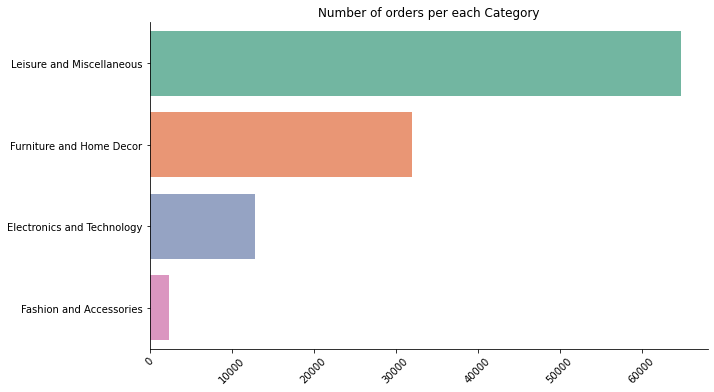

In [314]:
plt.figure(figsize = (10, 6))
sns.barplot(x = df_final['product_category'].value_counts().values, 
            y = df_final['product_category'].value_counts().index, 
            palette = 'Set2')
plt.title('Number of orders per each Category')
plt.xticks(rotation = 45)
sns.despine()

In [315]:
# résultat franchement desequilibré...

In [316]:
# (WIP) Drop inconsistent dates where "order_delivered_carrier_date" is greater than "order_delivered_customer_date"
# mettre shipping limit date en datetime avant
#df_final.drop((df_final[['order_delivered_carrier_date', 'order_delivered_customer_date']][df_final['shipping_limit_date'] < 0]).index, inplace = True)

In [317]:
# (WIP) - idem que cellule précédante, passer dates str -> dt
"""
# Shipping stat  S <-> C
# First get seller to carrier duration in days and classify the duration into 'OnTime/Early' & 'Late'
df_final['seller_to_carrier_status'] = np.where((df_final['shipping_limit_date'] - df_final['order_delivered_carrier_date']).dt.days >= 0, 'OnTime/Early', 'Late')
# First get difference between estimated delivery date and actual delivery date in days and classify the duration in 'OnTime/Early' & 'Late'
df_final['arrival_status'] = np.where((df_final['order_estimated_delivery_date'] - df_final['order_delivered_customer_date']).dt.days >= 0, 'OnTime/Early', 'Late')
"""

"\n# Shipping stat  S <-> C\n# First get seller to carrier duration in days and classify the duration into 'OnTime/Early' & 'Late'\ndf_final['seller_to_carrier_status'] = np.where((df_final['shipping_limit_date'] - df_final['order_delivered_carrier_date']).dt.days >= 0, 'OnTime/Early', 'Late')\n# First get difference between estimated delivery date and actual delivery date in days and classify the duration in 'OnTime/Early' & 'Late'\ndf_final['arrival_status'] = np.where((df_final['order_estimated_delivery_date'] - df_final['order_delivered_customer_date']).dt.days >= 0, 'OnTime/Early', 'Late')\n"

In [318]:
########## DATES ##########

# 'order_purchase_timestamp'
# 'order_approved_at'
# 'order_delivered_carrier_date'
# 'order_delivered_customer_date'
# 'order_estimated_delivery_date'
# 'shipping_limit_date'
# 'review_creation_date'
# 'review_answer_timestamp'

# convertir en dt
dates_to_convert = ['review_answer_timestamp',
                    'review_creation_date',
                    'order_purchase_timestamp',
                    'order_delivered_customer_date',
                    'order_estimated_delivery_date',
                    'order_delivered_carrier_date',
                    'order_approved_at',
                    'shipping_limit_date']

for x in dates_to_convert:
    df_final[x] = pd.to_datetime(df_final[x])

# créer les nouvelles features :
# - delta entre date envoi questionnaire satisfaction et réponse (pour avoir vitesse de réponse)
df_final['review_time'] = (df_final['review_answer_timestamp'] - df_final['review_creation_date']).dt.total_seconds()/(3600*24)

# - delta entre date d'achat et date effective de livraison
df_final['order_time'] = (df_final['order_delivered_customer_date'] - df_final['order_purchase_timestamp']).dt.total_seconds()/(3600*24)

# - delta entre livraison estimée et livraison effective
df_final['delivery_error_time'] = (df_final['order_delivered_customer_date'] - df_final['order_estimated_delivery_date']).dt.total_seconds()/(3600*24)

# - delta envoi de la commande par le vendeur (temps de préparation de la commande)
df_final['order_preparation_time'] = (df_final['order_delivered_carrier_date'] - df_final['order_approved_at']).dt.total_seconds()/(3600*24)

# - temps de livraison
df_final['delivery_time'] = (df_final['order_delivered_customer_date'] - df_final['order_delivered_carrier_date']).dt.total_seconds()/(3600*24)

# - est ce que le vendeur a dépassé le shipping limit date ou non ?
df_final['shipping_limit_respect'] = (df_final['shipping_limit_date'] - df_final['order_delivered_carrier_date']).dt.total_seconds()/(3600*24)

# drop features qui ne nous intéressent plus
df_final.drop(['review_answer_timestamp',
                    'review_creation_date',
                    'order_delivered_customer_date',
                    'order_estimated_delivery_date',
                    'order_delivered_carrier_date',
                    'order_approved_at',
                    'shipping_limit_date'], axis = 1, inplace = True)

# Ajout heure, jour, mois de l'achat
df_final['purchase_time']  = pd.to_datetime(df_final['order_purchase_timestamp'])
df_final['purchase_year'] = df_final['purchase_time'].dt.year
df_final['purchase_month'] = df_final['purchase_time'].dt.month
df_final['purchase_dayofweek'] = df_final['purchase_time'].dt.dayofweek
df_final['purchase_day'] = df_final['purchase_time'].dt.day
df_final['purchase_hour'] = df_final['purchase_time'].dt.hour

In [319]:
df_final['purchase_year'].unique()

array([2017., 2018.,   nan, 2016.])

In [320]:
########### REVIEWS ##########

df_final.loc[df_final['review_comment_message'].isna()]

# new feature -> review text oui/non

df_final['full_written_review'] = 1
df_final['full_written_review'].loc[df_final['review_comment_message'].isna()] = 0

df_final['written_review_title'] = 1
df_final['written_review_title'].loc[df_final['review_comment_title'].isna()] = 0

# drop les titres et textes des reviews (en portugais)
df_final.drop(['review_comment_title', 'review_comment_message'], axis = 1, inplace = True)

In [321]:
########### VOLUME (cm3) ##########
# volume = height*lenght*width (va permettre de passer de 3 variables à 1)

df_final['product_volume_cm3'] = df_final['product_length_cm'] \
                               * df_final['product_height_cm'] \
                               * df_final['product_width_cm']

df_final.drop(['product_length_cm', 'product_height_cm', 'product_width_cm'], axis = 1, inplace = True)

In [322]:
# frequence des commandes

# 2 ans de données -> prendre fréquence sur 6 mois ? ou prendre sur toutes les données ?

In [323]:
# https://blog.smile.io/how-to-calculate-purchase-frequency/

# customer order frequency = purchase frequency
# number of times that your customers make a purchase from you within a specified period of time

# Repeat Purchase Rate (RPR)
# = number of customers who bought more than once (365 days) divided by number of customers (365 days)

# Purchase Frequency (PF)
# = number of orders (365 days) divided by number of unique customers (365 days)

# Time Between Purchases (TBP)
# = 365 days divided by purchase frequency

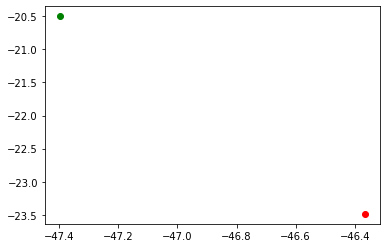

In [324]:
# plotter customer et seller -> TO DO -> VOIR SI J'ARRIVE A FAIRE  (parce que un peu moisi en l'état)

plt.figure()
plt.scatter(x = df_final['seller_geolocation_lng'][0], y = df_final['seller_geolocation_lat'][0], c = 'red') # sellers
plt.scatter(x = df_final['customer_geolocation_lng'][0], y = df_final['customer_geolocation_lat'][0], c = 'green') # customers
plt.show()

In [325]:
########### DISTANCE VENDEUR - ACHETEUR (km) ##########
# Calculer distance en km entre vendeur et acheteur

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

# calcul de la distance
df_final['distance'] = df_final.apply(lambda x: haversine(x['seller_geolocation_lat'],
                                                          x['seller_geolocation_lng'],
                                                          x['customer_geolocation_lat'],
                                                          x['customer_geolocation_lng']) * 0.90, axis = 1)

# droper coordonnées (car ne sera plus utile)
df_final.drop(
    [
        'seller_geolocation_lat', 
        'seller_geolocation_lng', 
        'customer_geolocation_lat', 
        'customer_geolocation_lng'
    ], 
    axis = 1, 
    inplace = True)

In [326]:
df_final.sample(6)

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_item_id,product_id,seller_id,price,freight_value,seller_city,seller_state,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,product_category,review_time,order_time,delivery_error_time,order_preparation_time,delivery_time,shipping_limit_respect,purchase_time,purchase_year,purchase_month,purchase_dayofweek,purchase_day,purchase_hour,full_written_review,written_review_title,product_volume_cm3,distance
28335,e5583a36cc70b95b339afc5d67c5efa2,c1b1eb8a5a67819956718ddddcf038e6,mogi das cruzes,SP,7d0f5759a0eac0f20456bb8a36547bf5,delivered,2018-03-19 00:31:01,1.0,656e0eca68dcecf6a31b8ececfabe3e8,8e6d7754bc7e0f22c96d255ebda59eba,89.8,7.97,sao jose dos campos,SP,45.0,236.0,1.0,173.0,1.0,credit_card,1.0,97.77,00d08db32e963156fe770fda369975d1,5.0,Electronics and Technology,0.85772,9.62057,-0.35789,7.81391,1.77917,-3.81391,2018-03-19 00:31:01,2018.0,3.0,0.0,19.0,0.0,1,0,2808.0,35.79817
49713,5f6b544cb597780c7495e93d0c470c3d,902e696c3adb44b46a7a5f07517bb884,barra de sao joao,RJ,840a030c24ea3c06dd506a43ce2a0c17,delivered,2018-05-03 12:59:16,1.0,812f428f6757ab16c46cffc68f2e90c5,eed78ac17f7f795a19a709745f00cd4e,59.8,23.00,botucatu,SP,53.0,1991.0,2.0,600.0,1.0,credit_card,3.0,248.40,206611e47986f3f21643135abc28d022,1.0,Furniture and Home Decor,1.65693,7.31834,-14.14050,1.04793,6.26159,4.95207,2018-05-03 12:59:16,2018.0,5.0,3.0,3.0,12.0,0,0,5880.0,648.03491
52617,f77c7eef15674a5fd3d3c13553ca803e,1a073bf0423277d82e201d983a86ceb1,sao paulo,SP,badcf619a4531116e06f0f2f6f711215,delivered,2017-05-08 08:53:43,1.0,a5a0e71a81ae65aa335e71c06261e260,c8417879a15366a17c30af34c798c332,38.0,17.09,sao paulo,SP,57.0,698.0,3.0,705.0,1.0,boleto,1.0,131.23,d7debc9bd20a58fd42365f7ac3595ec0,5.0,Furniture and Home Decor,1.16023,7.00902,-10.62035,3.22242,2.75745,2.77758,2017-05-08 08:53:43,2017.0,5.0,0.0,8.0,8.0,1,0,20944.0,7.25303
6968,10a1e2ad2a1671332d2ba53f19253bd5,62b35fe1a5889cd6b3e90874d1b4a74c,maua,SP,ebf908ba5d7c097d2839701fb3366412,delivered,2018-05-01 09:14:13,1.0,3dd2a17168ec895c781a9191c1e95ad7,de722cd6dad950a92b7d4f82673f8833,149.9,25.18,recife,PE,48.0,894.0,1.0,533.0,1.0,boleto,1.0,175.08,866e209369309ffb71be1490ba0f25aa,4.0,Electronics and Technology,0.53149,8.20698,-13.40815,0.42002,6.02241,5.57998,2018-05-01 09:14:13,2018.0,5.0,1.0,1.0,9.0,0,0,4840.0,1641.84261
13892,55c78bc29570e04ee3d2022cab98231b,3ddf75230a5da0dca3de49ea70faf061,sao paulo,SP,5aa16b50755d8657183ae7ea1a74543b,delivered,2017-08-20 21:34:05,1.0,d017a2151d543a9885604dc62a3d9dcc,6560211a19b47992c3666cc44a7e94c0,49.0,7.78,sao paulo,SP,59.0,93.0,7.0,250.0,1.0,boleto,1.0,56.78,207608b278634faecc647ad768b29354,4.0,Fashion and Accessories,3.98132,2.85433,-8.24700,0.61282,0.98019,5.38718,2017-08-20 21:34:05,2017.0,8.0,6.0,20.0,21.0,1,0,352.0,18.60076
4104,06fd2ea98fab51c01908f98806798c7c,ac3e0bfc1c22b67c4d7c11c7c78436ac,brasilia,DF,a91ea78c7808987db65e5b5b21666047,delivered,2017-09-11 18:49:02,1.0,3a16a1a14bd38281492d2a047c96e04d,6338ea67c41078a46ad99cc009654956,36.0,37.90,farroupilha,RS,50.0,1357.0,3.0,1600.0,1.0,credit_card,4.0,73.90,e7f8b25505fbf304024ee5c81a4f8678,5.0,Leisure and Miscellaneous,0.90771,13.85005,-9.36590,2.02593,11.81292,1.97407,2017-09-11 18:49:02,2017.0,9.0,0.0,11.0,18.0,0,0,22500.0,939.48545


In [327]:
# Export données 'propres' au format pickle pour rfm (garder id etc)

# Chemin d'accès aux données (à modifier si code en local)
#path = '/content/drive/MyDrive/OpenClassrooms/Projet5/' #-> pour colab
path = '' #-> en local

# specifier le chemin choisi
filepath = os.path.join(path, 'df_for_rfm')

# exporter en format pickle
with open(filepath, 'wb') as f:
    pickle.dump(df_final, f)

## Pré selection des variables

In [328]:
########## Drop des variables non pertinentes pour le clustering ##########

# Dropper les identifiants (ne seront plus utiles par la suite), purchase_time et 
# order_purchase_timestamp (dates et heures) ainsi que les villes, états... (on garde les coordonnées geo)

features_to_drop = [
    'customer_id', 
    'customer_unique_id', 
    'order_id', 
    'order_item_id', 
    'product_id', 
    'seller_id', 
    'review_id', 
    'purchase_time', 
    'order_purchase_timestamp', 
    'customer_city', 
    'customer_state', 
    'seller_city', 
    'seller_state'
]


df = df_final.drop(features_to_drop, 
                   axis = 1)

df.sample(5)

,order_status,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_type,payment_installments,payment_value,review_score,product_category,review_time,order_time,delivery_error_time,order_preparation_time,delivery_time,shipping_limit_respect,purchase_year,purchase_month,purchase_dayofweek,purchase_day,purchase_hour,full_written_review,written_review_title,product_volume_cm3,distance
42524,delivered,75.00,9.71,25.0,119.0,1.0,300.0,1.0,boleto,1.0,198.90,1.0,Leisure and Miscellaneous,3.10626,12.39302,-15.09536,1.23157,10.23260,4.76843,2017.0,9.0,2.0,6.0,12.0,1,0,2992.0,766.02943
76663,delivered,12.00,11.85,35.0,498.0,2.0,300.0,2.0,voucher,1.0,22.63,5.0,Leisure and Miscellaneous,2.47156,2.86025,-14.29083,0.68032,2.17103,3.31968,2017.0,5.0,0.0,15.0,20.0,0,0,1760.0,205.01311
37811,delivered,579.80,26.13,60.0,807.0,1.0,7300.0,1.0,credit_card,4.0,605.93,5.0,Furniture and Home Decor,1.09337,13.20463,-25.16853,5.19626,7.98884,19.80374,2018.0,3.0,6.0,4.0,15.0,0,0,34272.0,327.39409
85185,invoiced,284.99,14.00,36.0,1481.0,1.0,2775.0,1.0,credit_card,6.0,298.99,1.0,Leisure and Miscellaneous,2.55023,NaN,NaN,NaN,NaN,NaN,2018.0,5.0,6.0,20.0,9.0,0,1,6688.0,677.92410
78817,delivered,166.99,15.92,40.0,1456.0,1.0,2425.0,1.0,boleto,1.0,182.91,NaN,Leisure and Miscellaneous,NaN,5.48009,-13.97725,1.08280,4.38913,4.91720,2017.0,12.0,4.0,15.0,13.0,0,0,16530.0,124.46535


## Duplicats

In [329]:
# Vérifier qu'il n'y a pas de duplicats

print("\nPourcentage de duplicats :", end = "\n = ")
print(round((df.duplicated().sum().sum()/np.product(df.shape))*100, 2), end = " % \n")


Pourcentage de duplicats :
 = 0.34 % 


In [330]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119013    False
119014    False
119015    False
119016    False
119017    False
Length: 119018, dtype: bool

In [331]:
df.drop_duplicates(inplace = True)

## Imputation valeurs manquantes

In [332]:
df.shape

(107774, 28)

In [333]:
# ICI faire "controle qualité" et regarder données manquantes + faire imputation données manquantes ou drop des variables pour lesquelles les données sont trop éparses
df.isna().sum()

order_status                     1
price                          652
freight_value                  652
product_name_lenght           2198
product_description_lenght    2198
product_photos_qty            2198
product_weight_g               670
payment_sequential               2
payment_type                     2
payment_installments             2
payment_value                    2
review_score                   829
product_category              6043
review_time                    829
order_time                    2529
delivery_error_time           2529
order_preparation_time        1339
delivery_time                 2530
shipping_limit_respect        1326
purchase_year                    1
purchase_month                   1
purchase_dayofweek               1
purchase_day                     1
purchase_hour                    1
full_written_review              0
written_review_title             0
product_volume_cm3             670
distance                      1181
dtype: int64

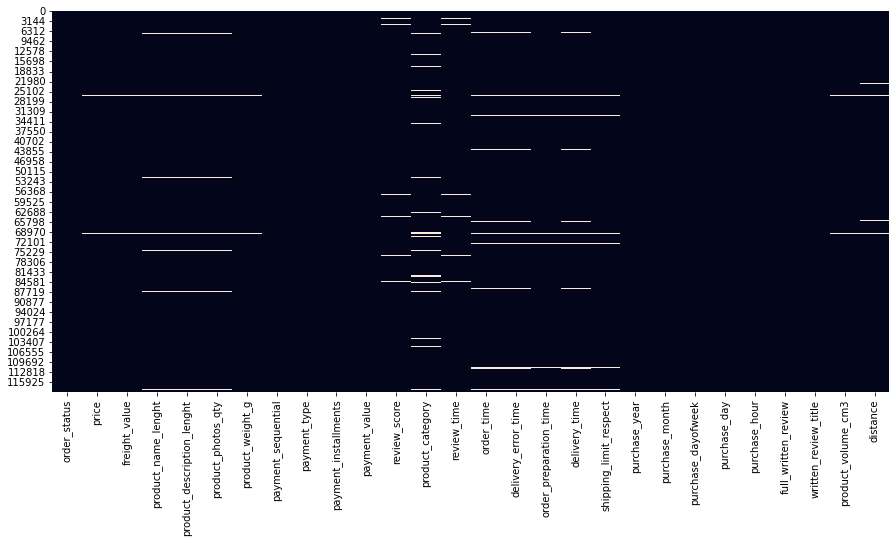

In [334]:
# heatmap des na
plt.figure(figsize = (15, 7))
sns.heatmap(df.isna(), cbar = False)
plt.show()

In [335]:
# Plusieurs lignes sur la heatmap -> commandes pour lesquelles il y a beaucoup de données manquantes
# sont probablement les commandes qui n'ont pas abouti
# les supprimer - on a 41 variables, prendre un seuil de 15 ou 20 variables pour dropper

# nombre de lignes avant traitement -> 119018
# seuil < 20 NaN -> 118377 rows restants
# seuil < 15 NaN -> 117740 rows restants
# seuil < 10 NaN -> 117738 rows restants
# -> peu de différences entre 10 et 15 - prendre 10

df = df[df.isna().sum(axis = 1) < 10]

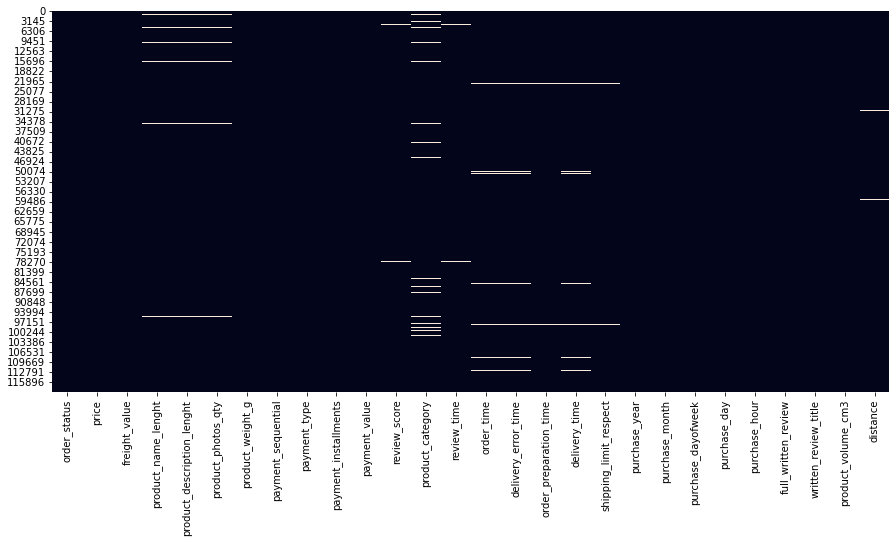

In [336]:
plt.figure(figsize = (15, 7))
sns.heatmap(df.isna(), cbar = False)
plt.show()

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107121 entries, 0 to 119017
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_status                107121 non-null  object 
 1   price                       107121 non-null  float64
 2   freight_value               107121 non-null  float64
 3   product_name_lenght         105576 non-null  float64
 4   product_description_lenght  105576 non-null  float64
 5   product_photos_qty          105576 non-null  float64
 6   product_weight_g            107103 non-null  float64
 7   payment_sequential          107120 non-null  float64
 8   payment_type                107120 non-null  object 
 9   payment_installments        107120 non-null  float64
 10  payment_value               107120 non-null  float64
 11  review_score                106310 non-null  float64
 12  product_category            101731 non-null  object 
 13  review_time   

In [338]:
# tableau nombre et pourcentage de valeurs manquantes par colonne
print('\nValeurs manquantes par colonne : \n')
pd.set_option('display.max_rows', None) # pour afficher toutes les lignes
values = df.isnull().sum()
percentage = 100 * values / len(df)
table = pd.concat([values, percentage.round(2)], axis = 1)
table.columns = ['Nombres de valeurs manquantes', '% de valeurs manquantes']
display(table[table['Nombres de valeurs manquantes'] != 0].sort_values('% de valeurs manquantes', ascending = False))
pd.reset_option('display.max_rows') # on reset l'option pour ne plus afficher toutes les lignes


Valeurs manquantes par colonne : 



,Nombres de valeurs manquantes,% de valeurs manquantes
product_category,5390,5.03
delivery_time,1877,1.75
delivery_error_time,1876,1.75
order_time,1876,1.75
product_description_lenght,1545,1.44
product_name_lenght,1545,1.44
product_photos_qty,1545,1.44
review_score,811,0.76
review_time,811,0.76
order_preparation_time,687,0.64


In [339]:
# Variables pour lesquelles il reste des NaN (faible pourcentage):

# VARIABLES QUALI
## product_category_name_english
## payment_type

# VARIABLES QUANTI
## payment_sequential
## product_name_lenght
## product_description_lenght
## product_photos_qty
## product_weight_g
## payment_installments
## payment_value
## review_score
## review_time
## order_time
## delivery_error_time
## order_preparation_time
## delivery_time
## shipping_limit_respect
## product_volume_cm3
## distance

In [340]:
# VARIABLES QUALI
# Traiter modalité par modalité et remplacer les NaN par la modalité la plus fréquente

# Catégories de produits
df['product_category'].value_counts()

Leisure and Miscellaneous     60063
Furniture and Home Decor      27807
Electronics and Technology    11582
Fashion and Accessories        2279
Name: product_category, dtype: int64

In [341]:
# Most common = 'bed_bath_table' - ou remplacer par 'unknown' ?? ou par rien ?

df['product_category'].fillna('', inplace = True)

In [342]:
# Type de paiement
df['payment_type'].value_counts()

credit_card    79295
boleto         20337
voucher         5904
debit_card      1584
Name: payment_type, dtype: int64

In [343]:
# Most common = credit_card

df_final['payment_type'].fillna('credit_card', inplace = True)

In [344]:
# VARIABLES QUANTI

df_con = df.select_dtypes(include = ['int', 'float'])
col = df_con.columns

In [345]:
df_con.shape

(107121, 25)

In [346]:
# CHOIX DE K

# dépend du pb -> si supervisé -> comme projet 4
# dépend du métier -> des fois certains nb de voisins font sens
# quand non supervisé -> cacher des valeurs et voir avec quel K on les trouve (très rarement fait)
# prendre valeur par défaut

# https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb#:~:text=The%20optimal%20K%20value%20usually,be%20aware%20of%20the%20outliers.

# "The optimal K value usually found is the square root of N, where N is the total number of samples."

# Nb samples
N = df_con.shape[0]

optimal_K = sqrt(N)
optimal_K

327.2934463138546

In [347]:
# mouaaaaaaaai....

In [348]:
# KNN imputer
KNN_imputer = KNNImputer()
df_KNN = KNN_imputer.fit_transform(df_con)

In [349]:
# donne un array - le convertir en df
df_con = pd.DataFrame(df_KNN, columns = col)

In [350]:
# mettre variables quali au même format que quanti
df_cat = df.select_dtypes(include = ['object'])
col = df_cat.columns

df = pd.concat([df_con, df_cat], axis = 1, join = 'inner')
df

,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_installments,payment_value,review_score,review_time,order_time,delivery_error_time,order_preparation_time,delivery_time,shipping_limit_respect,purchase_year,purchase_month,purchase_dayofweek,purchase_day,purchase_hour,full_written_review,written_review_title,product_volume_cm3,distance,order_status,payment_type,product_category
0,124.99,21.88,41.0,1141.0,1.0,8683.0,1.0,2.0,146.87,4.0,4.94074,8.81250,-10.55862,6.80955,1.99141,-0.80955,2017.0,5.0,1.0,16.0,15.0,0.0,0.0,107136.0,228.79538,delivered,credit_card,Furniture and Home Decor
1,289.00,46.48,43.0,1002.0,3.0,10150.0,1.0,8.0,335.48,5.0,11.94686,16.66175,-7.47131,2.84476,13.80995,3.15524,2018.0,1.0,4.0,12.0,20.0,0.0,0.0,53400.0,302.71858,delivered,credit_card,Furniture and Home Decor
2,139.94,17.79,55.0,955.0,1.0,8267.0,1.0,7.0,157.73,5.0,0.50763,26.07715,1.74920,21.92488,3.14434,-5.92488,2018.0,5.0,5.0,19.0,16.0,0.0,0.0,45968.0,29.14657,delivered,credit_card,Furniture and Home Decor
3,149.94,23.36,48.0,1066.0,1.0,12160.0,1.0,1.0,173.30,5.0,4.77554,14.99846,-12.33027,14.24541,0.69564,-0.28572,2018.0,3.0,1.0,13.0,16.0,0.0,0.0,79968.0,18.11744,delivered,credit_card,Furniture and Home Decor
4,230.00,22.25,61.0,407.0,1.0,5200.0,1.0,8.0,252.25,5.0,7.08324,11.46132,-5.12792,1.21240,10.23597,0.78760,2018.0,7.0,6.0,29.0,9.0,1.0,1.0,23625.0,187.45960,delivered,credit_card,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107115,55.00,20.88,12.0,210.0,2.0,1100.0,1.0,1.0,75.88,1.0,0.93984,17.57944,-18.45272,2.77409,14.76108,13.22591,2017.0,12.0,6.0,17.0,23.0,1.0,0.0,26496.0,307.25951,delivered,boleto,Leisure and Miscellaneous
107116,74.90,13.88,51.0,489.0,2.0,611.0,1.0,6.0,88.78,4.0,14.46880,6.17940,-11.16207,3.41656,2.74862,1.58344,2018.0,4.0,5.0,7.0,15.0,0.0,1.0,11132.0,329.23572,delivered,boleto,Leisure and Miscellaneous
107117,114.90,14.16,51.0,1193.0,1.0,1211.0,1.0,3.0,129.06,5.0,4.44172,7.44054,-8.21198,1.42179,6.00845,4.57821,2018.0,4.0,2.0,4.0,8.0,0.0,0.0,13200.0,188.57356,delivered,credit_card,Leisure and Miscellaneous
107118,37.00,19.04,60.0,575.0,1.0,870.0,1.0,5.0,56.04,1.0,4.07022,30.95237,7.79392,0.89044,30.04928,3.10956,2018.0,4.0,6.0,8.0,20.0,1.0,1.0,9000.0,1662.21122,delivered,boleto,Electronics and Technology


In [351]:
df.isna().sum()

price                         0
freight_value                 0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
payment_sequential            0
payment_installments          0
payment_value                 0
review_score                  0
review_time                   0
order_time                    0
delivery_error_time           0
order_preparation_time        0
delivery_time                 0
shipping_limit_respect        0
purchase_year                 0
purchase_month                0
purchase_dayofweek            0
purchase_day                  0
purchase_hour                 0
full_written_review           0
written_review_title          0
product_volume_cm3            0
distance                      0
order_status                  0
payment_type                  1
product_category              0
dtype: int64

## Outliers

In [352]:
# plus de nan -> ok pour isolation forest

# outliers detectés grâce aux boxplots
# vérifier avec Isolation Forest et supprimer lignes correspondantes

np.random.seed(1)

clf = IsolationForest()
preds = clf.fit_predict(df.select_dtypes(include = ['float64']))
preds

array([ 1,  1,  1, ...,  1, -1,  1])

In [353]:
# anomalies ont un score de -1 : on les enlève
df.drop(df.iloc[np.where(preds == -1)[0]].index,inplace = True)

df.shape

(88848, 28)

## Analyse univariée

In [354]:
# Faire une analyse par variable pour avoir quelque chose de propre et bien détécter outliers ou incohérences ?

In [355]:
# faire un graph qui regroupe évolution par mois du nb de commandes, du nb de clients et du CA etc
# idem avec toutes les dates

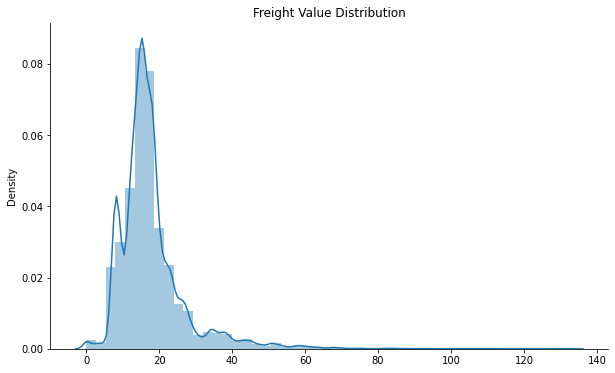

In [356]:
plt.figure(figsize = [10, 6])
sns.distplot(x = df['freight_value'])
plt.title('Freight Value Distribution')
sns.despine()
plt.show()

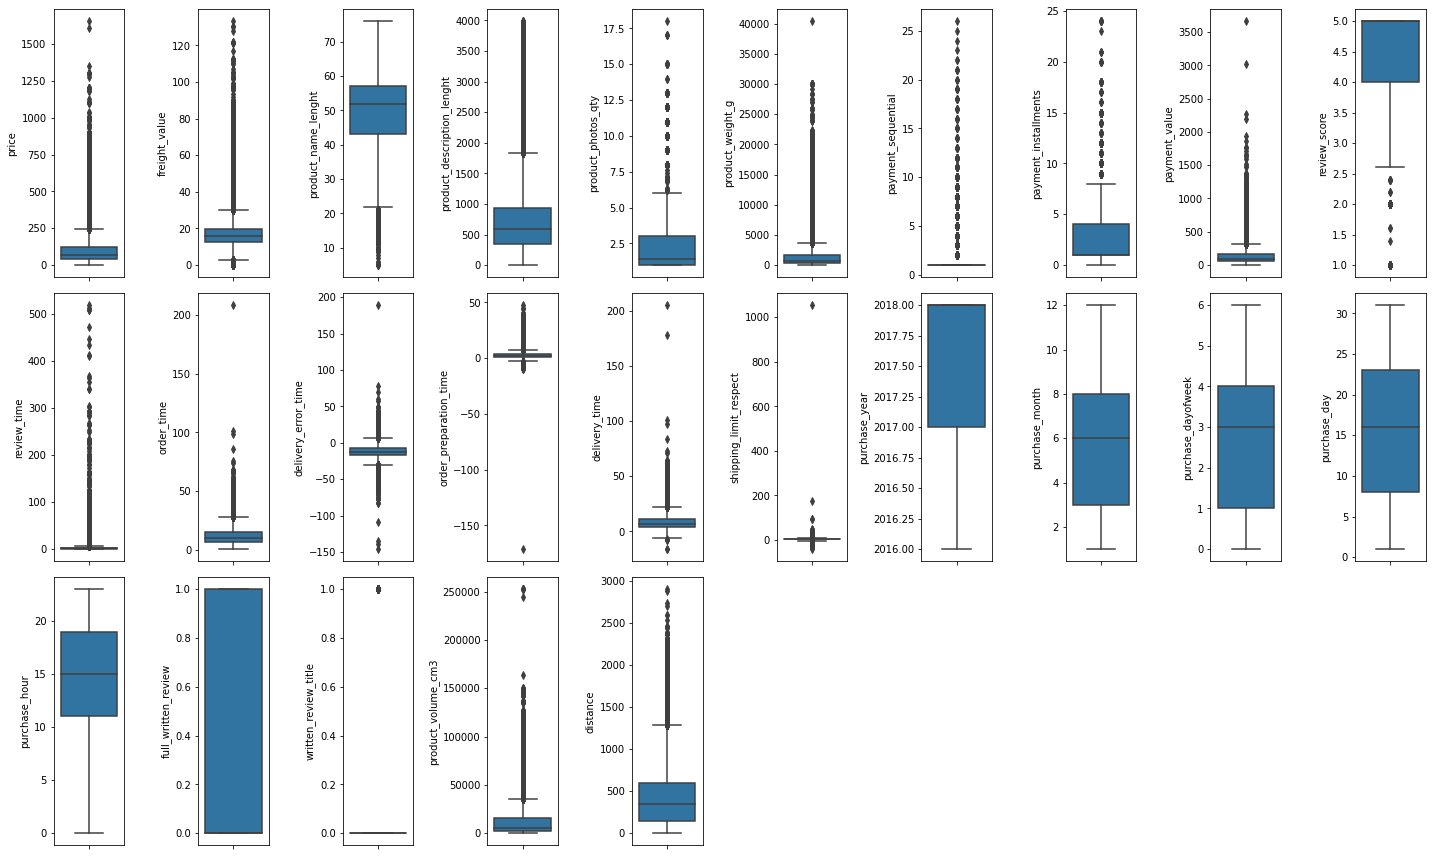

In [357]:
# Boxplots des variables quantitatives

columns = df.select_dtypes(include = ['float64']).columns
nb_lignes = len(columns)/10 # 10 = nb max de boxplots par lignes pour que ça soit lisible

figure = plt.figure(figsize = (20, 12))
for index, col in enumerate(columns):
    figure.add_subplot(int(np.ceil(nb_lignes)), 10, index + 1)
    sns.boxplot(y = col, data = df)
figure.tight_layout()
plt.show()

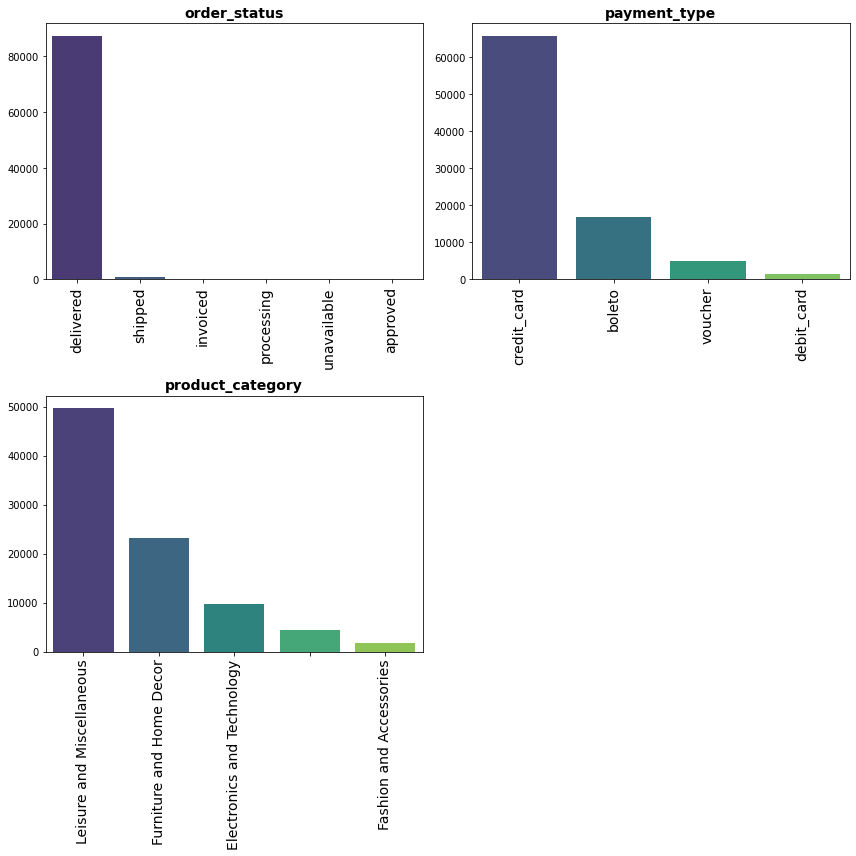

In [358]:
# Barplot des variables qualitatives

columns = df.select_dtypes(include = ['object']).columns
size = round(math.sqrt(len(columns)))

plt.figure(figsize = (12, 12))
i = 0
for index, col in enumerate(columns):
    if df[col].str.len().mean() < 100: # prendre seulement les colonnes dont les elements ne sont pas trop longs (pour ne pas prendre les descriptions par ex)
        i += 1
        plt.subplot(size, size, i)
        plt.title(col, fontsize = 14, weight = 'bold')
        plt.xticks(fontsize = 14, rotation = 90)
        ax = sns.barplot(x = df[col].value_counts().index[:10],
                        y = df[col].value_counts()[:10],
                        palette = 'viridis')
        ax.set(ylabel = None) # pour enlever nom de l'axe y
        plt.tight_layout()
plt.show()

In [359]:
# Order status -> à pas l'air franchement interessant - à ignorer pour le clustering

## Analyse bivariée

In [360]:
df

,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_installments,payment_value,review_score,review_time,order_time,delivery_error_time,order_preparation_time,delivery_time,shipping_limit_respect,purchase_year,purchase_month,purchase_dayofweek,purchase_day,purchase_hour,full_written_review,written_review_title,product_volume_cm3,distance,order_status,payment_type,product_category
0,124.99,21.88,41.0,1141.0,1.0,8683.0,1.0,2.0,146.87,4.0,4.94074,8.81250,-10.55862,6.80955,1.99141,-0.80955,2017.0,5.0,1.0,16.0,15.0,0.0,0.0,107136.0,228.79538,delivered,credit_card,Furniture and Home Decor
1,289.00,46.48,43.0,1002.0,3.0,10150.0,1.0,8.0,335.48,5.0,11.94686,16.66175,-7.47131,2.84476,13.80995,3.15524,2018.0,1.0,4.0,12.0,20.0,0.0,0.0,53400.0,302.71858,delivered,credit_card,Furniture and Home Decor
2,139.94,17.79,55.0,955.0,1.0,8267.0,1.0,7.0,157.73,5.0,0.50763,26.07715,1.74920,21.92488,3.14434,-5.92488,2018.0,5.0,5.0,19.0,16.0,0.0,0.0,45968.0,29.14657,delivered,credit_card,Furniture and Home Decor
3,149.94,23.36,48.0,1066.0,1.0,12160.0,1.0,1.0,173.30,5.0,4.77554,14.99846,-12.33027,14.24541,0.69564,-0.28572,2018.0,3.0,1.0,13.0,16.0,0.0,0.0,79968.0,18.11744,delivered,credit_card,Furniture and Home Decor
4,230.00,22.25,61.0,407.0,1.0,5200.0,1.0,8.0,252.25,5.0,7.08324,11.46132,-5.12792,1.21240,10.23597,0.78760,2018.0,7.0,6.0,29.0,9.0,1.0,1.0,23625.0,187.45960,delivered,credit_card,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107114,124.90,7.74,35.0,514.0,2.0,4338.0,1.0,1.0,132.64,4.0,1.58980,17.91031,-0.18514,16.75539,1.14611,-5.75539,2018.0,5.0,4.0,18.0,21.0,0.0,0.0,2856.0,37.83871,delivered,credit_card,Leisure and Miscellaneous
107115,55.00,20.88,12.0,210.0,2.0,1100.0,1.0,1.0,75.88,1.0,0.93984,17.57944,-18.45272,2.77409,14.76108,13.22591,2017.0,12.0,6.0,17.0,23.0,1.0,0.0,26496.0,307.25951,delivered,boleto,Leisure and Miscellaneous
107116,74.90,13.88,51.0,489.0,2.0,611.0,1.0,6.0,88.78,4.0,14.46880,6.17940,-11.16207,3.41656,2.74862,1.58344,2018.0,4.0,5.0,7.0,15.0,0.0,1.0,11132.0,329.23572,delivered,boleto,Leisure and Miscellaneous
107117,114.90,14.16,51.0,1193.0,1.0,1211.0,1.0,3.0,129.06,5.0,4.44172,7.44054,-8.21198,1.42179,6.00845,4.57821,2018.0,4.0,2.0,4.0,8.0,0.0,0.0,13200.0,188.57356,delivered,credit_card,Leisure and Miscellaneous


In [361]:
df['Count'] = 1

In [362]:
df.groupby('purchase_month')['Count'].sum()

purchase_month
1.0     7256
2.0     7362
3.0     8719
4.0     8354
5.0     9405
6.0     8494
7.0     9371
8.0     9785
9.0     3928
10.0    4386
11.0    6741
12.0    5047
Name: Count, dtype: int64

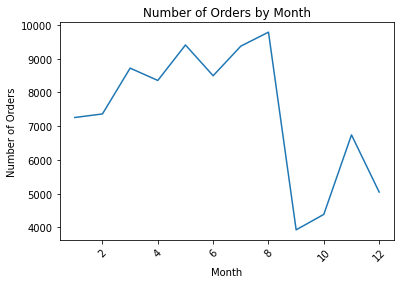

In [363]:
## evolution du nb de commandes par mois

plt.figure()
sns.lineplot(x = df.groupby('purchase_month')['Count'].sum().index,
             y = df.groupby('purchase_month')['Count'].sum().values, 
             markers = True)
plt.title('Number of Orders by Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation = 45)
plt.show()

In [364]:
# Très peu de commandes en septembre
# Petit pic en Novembre (pour Noel ? )
# Majorité des commandes entre Mars et Aout

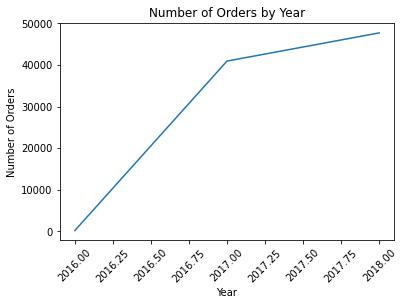

In [365]:
## evolution du nb de commandes par année

plt.figure()
sns.lineplot(x = df.groupby('purchase_year')['Count'].sum().index,
             y = df.groupby('purchase_year')['Count'].sum().values, 
             markers = True)
plt.title('Number of Orders by Year')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.xticks(rotation = 45)
plt.show()

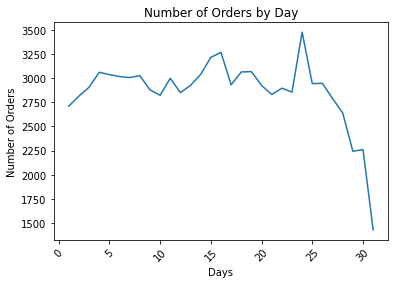

In [366]:
## evolution du nb de commandes par jour du mois

plt.figure()
sns.lineplot(x = df.groupby('purchase_day')['Count'].sum().index,
             y = df.groupby('purchase_day')['Count'].sum().values, 
             markers = True)
plt.title('Number of Orders by Day')
plt.xlabel('Days')
plt.ylabel('Number of Orders')
plt.xticks(rotation = 45)
plt.show()

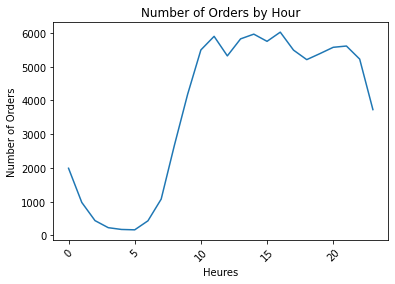

In [367]:
## evolution du nb de commandes par heure de la journée

plt.figure()
sns.lineplot(x = df.groupby('purchase_hour')['Count'].sum().index,
             y = df.groupby('purchase_hour')['Count'].sum().values, 
             markers = True)
plt.title('Number of Orders by Hour')
plt.xlabel('Heures')
plt.ylabel('Number of Orders')
plt.xticks(rotation = 45)
plt.show()

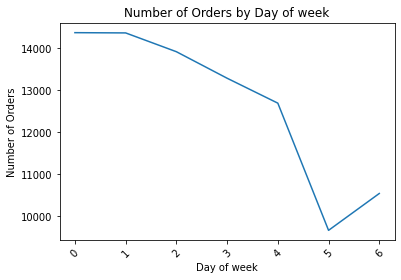

In [368]:
## evolution du nb de commandes par jour de la semaine

plt.figure()
sns.lineplot(x = df.groupby('purchase_dayofweek')['Count'].sum().index,
             y = df.groupby('purchase_dayofweek')['Count'].sum().values, 
             markers = True)
plt.title('Number of Orders by Day of week')
plt.xlabel('Day of week')
plt.ylabel('Number of Orders')
plt.xticks(rotation = 45)
plt.show()

In [369]:
# Retrouver correspondance des jours de la semaine (0 = lundi ou 0 = dimanche ? )

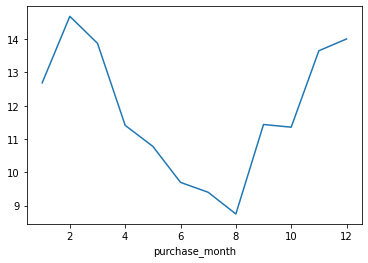

In [370]:
# Evolution du temps des commandes (délai entre commande et livraison)

plt.figure()
sns.lineplot(x = df.groupby('purchase_month')['order_time'].mean().index, 
             y = df.groupby('purchase_month')['order_time'].mean().values, 
             markers = True)
plt.show()

In [371]:
# délai de préparation des commandes et de livraison très court en été

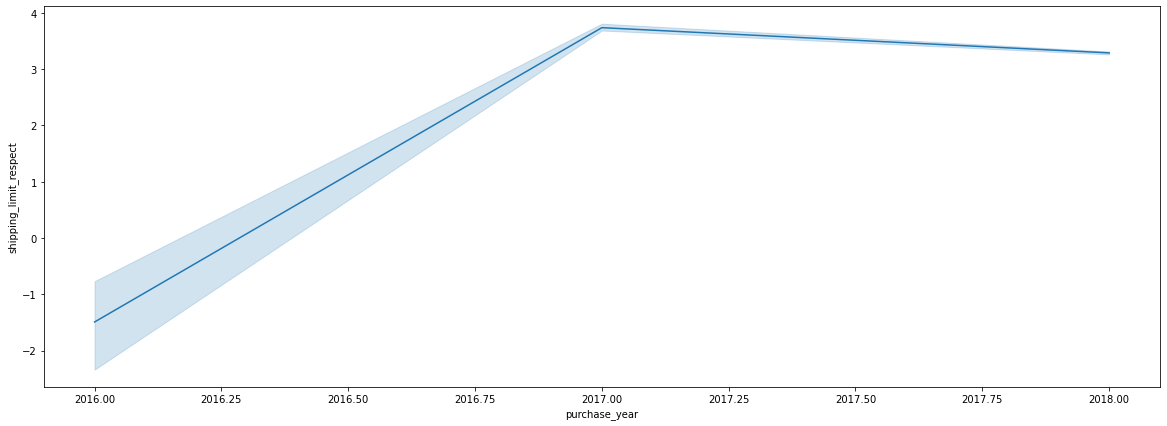

In [372]:
# Evolution du retard de livraison en fonction des années (zoom sur 2017)

plt.figure(figsize = (20, 7))
sns.lineplot(data = df, 
             x = 'purchase_year', 
             y = 'shipping_limit_respect', 
             markers = True)
plt.show()

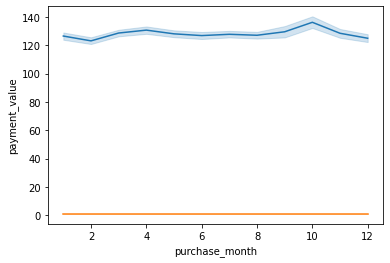

In [373]:
# Ventes de la plateforme par mois vs nb de commandes par mois

plt.figure()
sns.lineplot(data = df, x = 'purchase_month', y = 'payment_value', markers = True)
sns.lineplot(data = df, x = 'purchase_month', y = 'Count', markers = True)
plt.show()

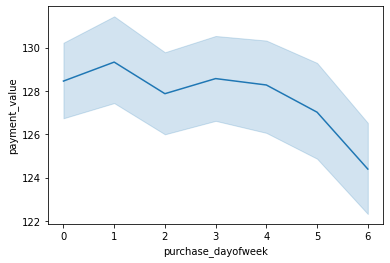

In [374]:
# Ventes de la plateforme par jour de la semaine

plt.figure()
sns.lineplot(data = df, x = 'purchase_dayofweek', y = 'payment_value', markers = True)
plt.show()

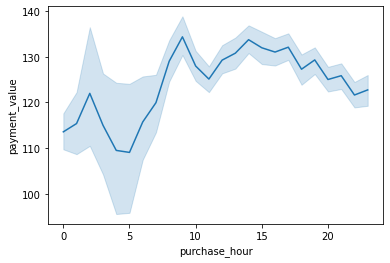

In [375]:
# Ventes de la plateforme par heure de la journée

plt.figure()
sns.lineplot(data = df, x = 'purchase_hour', y = 'payment_value', markers = True)
plt.show()

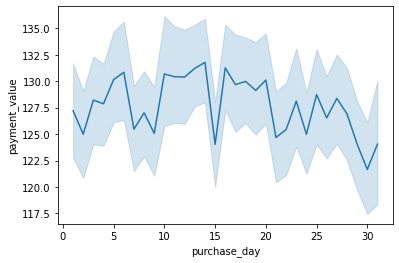

In [376]:
# Ventes de la plateforme par jour du mois

plt.figure()
sns.lineplot(data = df, x = 'purchase_day', y = 'payment_value', markers = True)
plt.show()

In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88848 entries, 0 to 107120
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       88848 non-null  float64
 1   freight_value               88848 non-null  float64
 2   product_name_lenght         88848 non-null  float64
 3   product_description_lenght  88848 non-null  float64
 4   product_photos_qty          88848 non-null  float64
 5   product_weight_g            88848 non-null  float64
 6   payment_sequential          88848 non-null  float64
 7   payment_installments        88848 non-null  float64
 8   payment_value               88848 non-null  float64
 9   review_score                88848 non-null  float64
 10  review_time                 88848 non-null  float64
 11  order_time                  88848 non-null  float64
 12  delivery_error_time         88848 non-null  float64
 13  order_preparation_time      88

In [378]:
df.columns

Index(['price', 'freight_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'payment_sequential', 'payment_installments', 'payment_value',
       'review_score', 'review_time', 'order_time', 'delivery_error_time',
       'order_preparation_time', 'delivery_time', 'shipping_limit_respect',
       'purchase_year', 'purchase_month', 'purchase_dayofweek', 'purchase_day',
       'purchase_hour', 'full_written_review', 'written_review_title',
       'product_volume_cm3', 'distance', 'order_status', 'payment_type',
       'product_category', 'Count'],
      dtype='object')

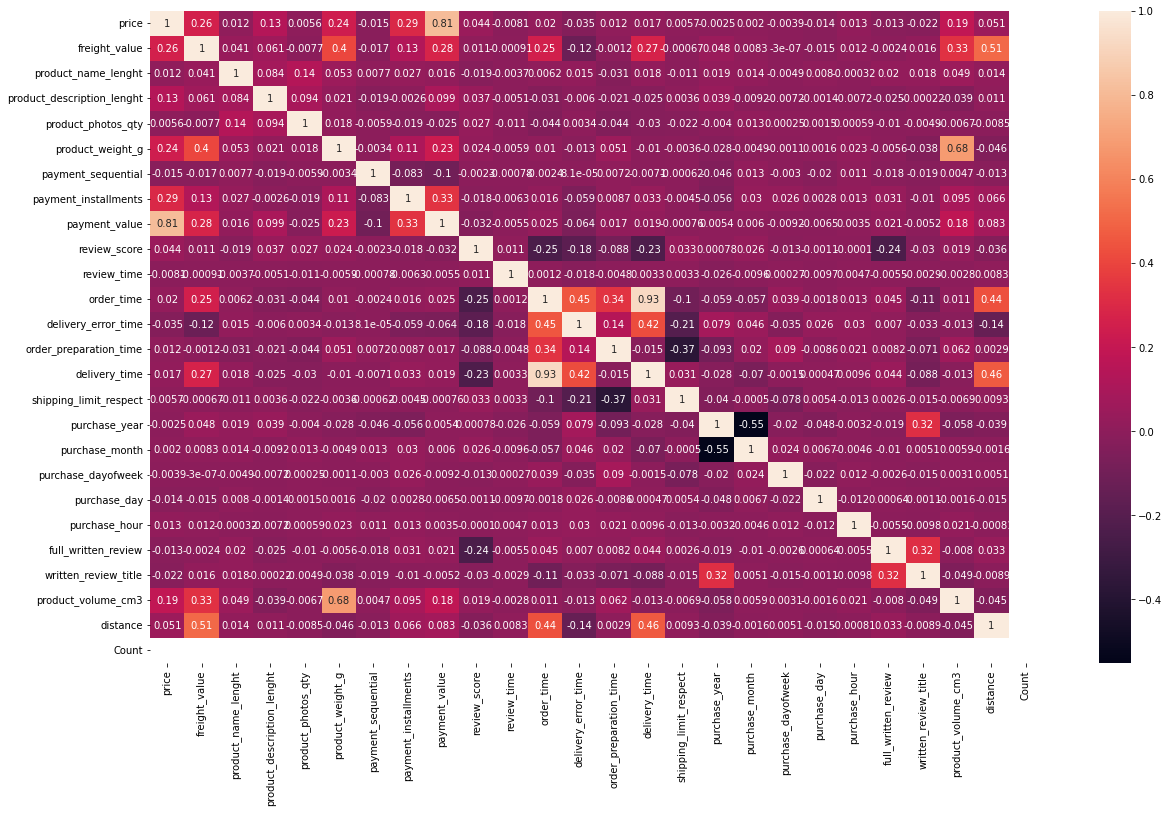

In [379]:
# Matrice de corrélations
plt.figure(figsize = (20, 12))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [380]:
# order_time et delivery_time très fortement corrélés -> garder un des deux seulement
# drop delivery_time car n'est pas fonction du client or ici on essaie de segmenter les comportements clients

# poids et volume fortement corrélés -> garder un des deux seulement
# poids et freight_value fortement corrélés
# freight_value et volume sont aussi fortement corrélés (moins que poids mais quand même)
# garder poids et supprimer les deux autres ? ou garder les deux autres et supprimer le poids ?
# supprimer freight_value car prit en compte dans payment_value
# supprimer volume et garder poids -> et faire l'inverse si résultats sont pas bons

# payment_value et price fortement corrélés -> garder un des deux seulement
# garder payment_value (car prend en compte prix de la livraison)

df.drop(['delivery_time', 'price', 'freight_value', 'product_volume_cm3'], axis = 1, inplace = True)

In [381]:
# supprimer aussi purchase_year ?
# on a vu que le nombre de commandes a augmenté avec les années mais sinon pas pertinent pour notre
# problématique
# drop aussi 'count' -> créé seulement pour les graphs

df.drop(['purchase_year', 'Count'], axis = 1, inplace = True)

In [382]:
df.reset_index(drop = True, inplace = True)

In [383]:
df.columns

Index(['product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'payment_sequential',
       'payment_installments', 'payment_value', 'review_score', 'review_time',
       'order_time', 'delivery_error_time', 'order_preparation_time',
       'shipping_limit_respect', 'purchase_month', 'purchase_dayofweek',
       'purchase_day', 'purchase_hour', 'full_written_review',
       'written_review_title', 'distance', 'order_status', 'payment_type',
       'product_category'],
      dtype='object')

In [384]:
# Pairplot
plt.figure()
#sns.pairplot(df, hue = 'payment_type') # trop lourd avec couleur
#sns.pairplot(df) # trop lourd avec couleur # trop de variables, pas super lisible
plt.show()

<Figure size 432x288 with 0 Axes>

In [385]:
# Anova ??

# CONDITIONS D'APPLICATION

In [386]:
# Anova
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [387]:
def anova(df, variable):

    print('\t') 
    print('----------------------------------------------------')
    print('\nANOVA \n')
    print('----------------------------------------------------')
    print('\t')

    
    # renommer colonnes pour enlever "-"
    df.columns = df.columns.str.replace('-', '_')

    # calculer dimension des subplots
    columns = df.select_dtypes(include = ['float64']).columns
    size = round(math.sqrt(len(columns)))

    plt.figure(figsize = (25, 15))
    i = 0
    for index, col in enumerate(columns):
        i += 1
        if col != variable:
            mod = ols(f'{col} ~ {variable}', data = df).fit()
            # do type 2 anova
            aov_table = sm.stats.anova_lm(mod, typ = 2)
            print('\t')
            #print("----------------------------------------------------")
            print(f'ANOVA table pour {col}')
            print('----------------------------------------------------')
            display(aov_table)
            print('\t')

            pvalue = round(aov_table['PR(>F)'][variable], 2)

            if aov_table['PR(>F)'][variable] > 0.05:
                print(f" ---> l'hypothèse nulle est acceptée: le {col} ne varie pas selon le {variable}")
                print('\t')
            else:
                print(f" ---> l'hypothèse nulle est rejetée: le {col} varie selon le {variable}")
                print('\t')

        # plot
        plt.subplot(size, size, i)
        plt.title(f'{col} - p-value = {pvalue}')
        sns.boxplot(x = df[col], 
                    y = df[variable], 
                    data = df, 
                    #order=['e', 'd', 'c', 'b', 'a']
                    )
        plt.xticks(rotation = 90)
    plt.tight_layout()
    
    print('\t') 
    print('----------------------------------------------------')
    print(f'\nBoxplot des variables en fonction du {variable}\n')
    print('----------------------------------------------------')
    print('\t')
    
    plt.show()

In [388]:
# à modifier, beaucoup trop long

In [389]:
# anova avec nutrition_grade
#anova(df, variable = 'purchase_month')

## Scaling

In [390]:
df.select_dtypes(include = 'object')

,order_status,payment_type,product_category
0,delivered,credit_card,Furniture and Home Decor
1,delivered,credit_card,Furniture and Home Decor
2,delivered,credit_card,Furniture and Home Decor
3,delivered,credit_card,Furniture and Home Decor
4,delivered,credit_card,
...,...,...,...
88843,delivered,credit_card,Leisure and Miscellaneous
88844,delivered,boleto,Leisure and Miscellaneous
88845,delivered,boleto,Leisure and Miscellaneous
88846,delivered,credit_card,Leisure and Miscellaneous


In [391]:
# standardiser variables quanti

# isoler variables quanti
df_quanti = df.select_dtypes(include = ['int', 'float'])
df_quanti.columns

Index(['product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'payment_sequential',
       'payment_installments', 'payment_value', 'review_score', 'review_time',
       'order_time', 'delivery_error_time', 'order_preparation_time',
       'shipping_limit_respect', 'purchase_month', 'purchase_dayofweek',
       'purchase_day', 'purchase_hour', 'full_written_review',
       'written_review_title', 'distance'],
      dtype='object')

In [392]:
df_quanti

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_installments,payment_value,review_score,review_time,order_time,delivery_error_time,order_preparation_time,shipping_limit_respect,purchase_month,purchase_dayofweek,purchase_day,purchase_hour,full_written_review,written_review_title,distance
0,41.0,1141.0,1.0,8683.0,1.0,2.0,146.87,4.0,4.94074,8.81250,-10.55862,6.80955,-0.80955,5.0,1.0,16.0,15.0,0.0,0.0,228.79538
1,43.0,1002.0,3.0,10150.0,1.0,8.0,335.48,5.0,11.94686,16.66175,-7.47131,2.84476,3.15524,1.0,4.0,12.0,20.0,0.0,0.0,302.71858
2,55.0,955.0,1.0,8267.0,1.0,7.0,157.73,5.0,0.50763,26.07715,1.74920,21.92488,-5.92488,5.0,5.0,19.0,16.0,0.0,0.0,29.14657
3,48.0,1066.0,1.0,12160.0,1.0,1.0,173.30,5.0,4.77554,14.99846,-12.33027,14.24541,-0.28572,3.0,1.0,13.0,16.0,0.0,0.0,18.11744
4,61.0,407.0,1.0,5200.0,1.0,8.0,252.25,5.0,7.08324,11.46132,-5.12792,1.21240,0.78760,7.0,6.0,29.0,9.0,1.0,1.0,187.45960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88843,35.0,514.0,2.0,4338.0,1.0,1.0,132.64,4.0,1.58980,17.91031,-0.18514,16.75539,-5.75539,5.0,4.0,18.0,21.0,0.0,0.0,37.83871
88844,12.0,210.0,2.0,1100.0,1.0,1.0,75.88,1.0,0.93984,17.57944,-18.45272,2.77409,13.22591,12.0,6.0,17.0,23.0,1.0,0.0,307.25951
88845,51.0,489.0,2.0,611.0,1.0,6.0,88.78,4.0,14.46880,6.17940,-11.16207,3.41656,1.58344,4.0,5.0,7.0,15.0,0.0,1.0,329.23572
88846,51.0,1193.0,1.0,1211.0,1.0,3.0,129.06,5.0,4.44172,7.44054,-8.21198,1.42179,4.57821,4.0,2.0,4.0,8.0,0.0,0.0,188.57356


In [393]:
# Standard scaler -> subtracts the mean from each data point and then divides the result by the standard deviation. 
# This results in a dataset with a mean of 0 and a standard deviation of 1.

# MinMaxScaler -> subtracts the minimum value from each data point and then divides the result by the difference 
# between the maximum and minimum values. This results in a dataset with values ranging between 0 and 1.

In [394]:
"""# MinMaxScaler

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit the scaler
scaler.fit(df)

# Transform the data using the fitted scaler
scaled_data = scaler.transform(df)"""

'# MinMaxScaler\n\n# Create a MinMaxScaler instance\nscaler = MinMaxScaler()\n\n# Fit the scaler\nscaler.fit(df)\n\n# Transform the data using the fitted scaler\nscaled_data = scaler.transform(df)'

In [395]:
# scaling

scaler = StandardScaler()
df_quanti_std = scaler.fit_transform(df_quanti)

df_quanti_std = pd.DataFrame(data = df_quanti_std, columns = df_quanti.columns)
df_quanti_std

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_installments,payment_value,review_score,review_time,order_time,delivery_error_time,order_preparation_time,shipping_limit_respect,purchase_month,purchase_dayofweek,purchase_day,purchase_hour,full_written_review,written_review_title,distance
0,-0.79881,0.65252,-0.71331,2.85354,-0.12799,-0.28538,0.16219,-0.12180,0.21951,-0.37966,0.14844,1.57534,-0.90448,-0.32486,-0.89330,0.05362,0.03081,-0.81120,-0.34444,-0.53399
1,-0.59643,0.42185,0.47266,3.44189,-0.12799,2.08428,1.77140,0.65908,1.00620,0.68584,0.50993,0.11200,-0.06940,-1.56486,0.63693,-0.41028,0.97837,-0.81120,-0.34444,-0.35294
2,0.61784,0.34386,-0.71331,2.68670,-0.12799,1.68933,0.25484,0.65908,-0.27826,1.96395,1.58953,7.15415,-1.98188,-0.32486,1.14700,0.40155,0.22032,-0.81120,-0.34444,-1.02293
3,-0.09048,0.52806,-0.71331,4.24803,-0.12799,-0.68033,0.38768,0.65908,0.20096,0.46006,-0.05899,4.31979,-0.79414,-0.94486,-0.89330,-0.29430,0.22032,-0.81120,-0.34444,-1.04994
4,1.22497,-0.56555,-0.71331,1.45664,-0.12799,2.08428,1.06128,0.65908,0.46008,-0.02009,0.78431,-0.49048,-0.56808,0.29514,1.65707,1.56132,-1.10626,1.23274,2.90325,-0.63522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88843,-1.40594,-0.38798,-0.12033,1.11093,-0.12799,-0.68033,0.04078,-0.12180,-0.15675,0.85533,1.36304,5.24618,-1.94619,-0.32486,0.63693,0.28558,1.16788,-0.81120,-0.34444,-1.00165
88844,-3.73329,-0.89247,-0.12033,-0.18771,-0.12799,-0.68033,-0.44350,-2.46442,-0.22973,0.81042,-0.77585,0.08591,2.05172,1.84514,1.65707,0.16960,1.54690,1.23274,-0.34444,-0.34182
88845,0.21308,-0.42947,-0.12033,-0.38383,-0.12799,1.29439,-0.33344,-0.12180,1.28937,-0.73709,0.07779,0.32304,-0.40046,-0.63486,1.14700,-0.99016,0.03081,-0.81120,2.90325,-0.28800
88846,0.21308,0.73882,-0.71331,-0.14319,-0.12799,0.10956,0.01023,0.65908,0.16348,-0.56590,0.42320,-0.41319,0.23031,-0.63486,-0.38322,-1.33809,-1.29577,-0.81120,-0.34444,-0.63249


In [396]:
########## CONCATENATION ##########
# concatener données qualitatives 'brutes' et quantitatives standardisées

df = pd.concat([df_quanti_std, df['order_status'], df['payment_type'], df['product_category']], axis = 1)
df

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_installments,payment_value,review_score,review_time,order_time,delivery_error_time,order_preparation_time,shipping_limit_respect,purchase_month,purchase_dayofweek,purchase_day,purchase_hour,full_written_review,written_review_title,distance,order_status,payment_type,product_category
0,-0.79881,0.65252,-0.71331,2.85354,-0.12799,-0.28538,0.16219,-0.12180,0.21951,-0.37966,0.14844,1.57534,-0.90448,-0.32486,-0.89330,0.05362,0.03081,-0.81120,-0.34444,-0.53399,delivered,credit_card,Furniture and Home Decor
1,-0.59643,0.42185,0.47266,3.44189,-0.12799,2.08428,1.77140,0.65908,1.00620,0.68584,0.50993,0.11200,-0.06940,-1.56486,0.63693,-0.41028,0.97837,-0.81120,-0.34444,-0.35294,delivered,credit_card,Furniture and Home Decor
2,0.61784,0.34386,-0.71331,2.68670,-0.12799,1.68933,0.25484,0.65908,-0.27826,1.96395,1.58953,7.15415,-1.98188,-0.32486,1.14700,0.40155,0.22032,-0.81120,-0.34444,-1.02293,delivered,credit_card,Furniture and Home Decor
3,-0.09048,0.52806,-0.71331,4.24803,-0.12799,-0.68033,0.38768,0.65908,0.20096,0.46006,-0.05899,4.31979,-0.79414,-0.94486,-0.89330,-0.29430,0.22032,-0.81120,-0.34444,-1.04994,delivered,credit_card,Furniture and Home Decor
4,1.22497,-0.56555,-0.71331,1.45664,-0.12799,2.08428,1.06128,0.65908,0.46008,-0.02009,0.78431,-0.49048,-0.56808,0.29514,1.65707,1.56132,-1.10626,1.23274,2.90325,-0.63522,delivered,credit_card,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88843,-1.40594,-0.38798,-0.12033,1.11093,-0.12799,-0.68033,0.04078,-0.12180,-0.15675,0.85533,1.36304,5.24618,-1.94619,-0.32486,0.63693,0.28558,1.16788,-0.81120,-0.34444,-1.00165,delivered,credit_card,Leisure and Miscellaneous
88844,-3.73329,-0.89247,-0.12033,-0.18771,-0.12799,-0.68033,-0.44350,-2.46442,-0.22973,0.81042,-0.77585,0.08591,2.05172,1.84514,1.65707,0.16960,1.54690,1.23274,-0.34444,-0.34182,delivered,boleto,Leisure and Miscellaneous
88845,0.21308,-0.42947,-0.12033,-0.38383,-0.12799,1.29439,-0.33344,-0.12180,1.28937,-0.73709,0.07779,0.32304,-0.40046,-0.63486,1.14700,-0.99016,0.03081,-0.81120,2.90325,-0.28800,delivered,boleto,Leisure and Miscellaneous
88846,0.21308,0.73882,-0.71331,-0.14319,-0.12799,0.10956,0.01023,0.65908,0.16348,-0.56590,0.42320,-0.41319,0.23031,-0.63486,-0.38322,-1.33809,-1.29577,-0.81120,-0.34444,-0.63249,delivered,credit_card,Leisure and Miscellaneous


## Encoding

In [397]:
df.select_dtypes(include = 'object')

,order_status,payment_type,product_category
0,delivered,credit_card,Furniture and Home Decor
1,delivered,credit_card,Furniture and Home Decor
2,delivered,credit_card,Furniture and Home Decor
3,delivered,credit_card,Furniture and Home Decor
4,delivered,credit_card,
...,...,...,...
88843,delivered,credit_card,Leisure and Miscellaneous
88844,delivered,boleto,Leisure and Miscellaneous
88845,delivered,boleto,Leisure and Miscellaneous
88846,delivered,credit_card,Leisure and Miscellaneous


In [398]:
# Variables qualitatives à encoder =

#
#
#


In [399]:
##### Order_status #####
# -> comme on a vu dans data explo, on a delivered et le reste donc faire encoding en prenant:
# delivered = 1
# le reste = 0

# Créer le dictionnaire pour le mapping
mapping_order_status = {
    'approved' : 0, 
    'delivered' : 1, 
    'invoiced' : 0, 
    'processing' : 0, 
    'shipped' : 0,
    'unavailable' : 0
}

# utiliser le dictionnaire pour encoder la variable
df['order_status'] = df['order_status'].map(mapping_order_status)

# 'visualiser' résultat
df['order_status'].value_counts()

1    87338
0     1510
Name: order_status, dtype: int64

In [400]:
# trèèèèès unbalanced... quasiment que des commandes livrées -> à exclure ? par super informatif a priori

In [401]:
##### Payment type #####
df['payment_type'].value_counts()

credit_card    65716
boleto         16861
voucher         4945
debit_card      1325
Name: payment_type, dtype: int64

In [402]:
# credit card vs le reste

# Créer le dictionnaire pour le mapping
mapping_payment_type = {
    'credit_card' : 1, 
    'boleto' : 0, 
    'voucher' : 0, 
    'debit_card' : 0
}

# utiliser le dictionnaire pour encoder la variable
df['payment_type'] = df['payment_type'].map(mapping_payment_type)

# 'visualiser' résultat
df['payment_type'].value_counts()

1.0    65716
0.0    23131
Name: payment_type, dtype: int64

In [403]:
##### product category #####

# séparer chaque catégorie pour créer une variable par catégorie
# -> utiliser get dummies

df = pd.get_dummies(df, columns = ['product_category'])
df

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_installments,payment_value,review_score,review_time,order_time,delivery_error_time,order_preparation_time,shipping_limit_respect,purchase_month,purchase_dayofweek,purchase_day,purchase_hour,full_written_review,written_review_title,distance,order_status,payment_type,product_category_,product_category_Electronics and Technology,product_category_Fashion and Accessories,product_category_Furniture and Home Decor,product_category_Leisure and Miscellaneous
0,-0.79881,0.65252,-0.71331,2.85354,-0.12799,-0.28538,0.16219,-0.12180,0.21951,-0.37966,0.14844,1.57534,-0.90448,-0.32486,-0.89330,0.05362,0.03081,-0.81120,-0.34444,-0.53399,1,1.0,0,0,0,1,0
1,-0.59643,0.42185,0.47266,3.44189,-0.12799,2.08428,1.77140,0.65908,1.00620,0.68584,0.50993,0.11200,-0.06940,-1.56486,0.63693,-0.41028,0.97837,-0.81120,-0.34444,-0.35294,1,1.0,0,0,0,1,0
2,0.61784,0.34386,-0.71331,2.68670,-0.12799,1.68933,0.25484,0.65908,-0.27826,1.96395,1.58953,7.15415,-1.98188,-0.32486,1.14700,0.40155,0.22032,-0.81120,-0.34444,-1.02293,1,1.0,0,0,0,1,0
3,-0.09048,0.52806,-0.71331,4.24803,-0.12799,-0.68033,0.38768,0.65908,0.20096,0.46006,-0.05899,4.31979,-0.79414,-0.94486,-0.89330,-0.29430,0.22032,-0.81120,-0.34444,-1.04994,1,1.0,0,0,0,1,0
4,1.22497,-0.56555,-0.71331,1.45664,-0.12799,2.08428,1.06128,0.65908,0.46008,-0.02009,0.78431,-0.49048,-0.56808,0.29514,1.65707,1.56132,-1.10626,1.23274,2.90325,-0.63522,1,1.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88843,-1.40594,-0.38798,-0.12033,1.11093,-0.12799,-0.68033,0.04078,-0.12180,-0.15675,0.85533,1.36304,5.24618,-1.94619,-0.32486,0.63693,0.28558,1.16788,-0.81120,-0.34444,-1.00165,1,1.0,0,0,0,0,1
88844,-3.73329,-0.89247,-0.12033,-0.18771,-0.12799,-0.68033,-0.44350,-2.46442,-0.22973,0.81042,-0.77585,0.08591,2.05172,1.84514,1.65707,0.16960,1.54690,1.23274,-0.34444,-0.34182,1,0.0,0,0,0,0,1
88845,0.21308,-0.42947,-0.12033,-0.38383,-0.12799,1.29439,-0.33344,-0.12180,1.28937,-0.73709,0.07779,0.32304,-0.40046,-0.63486,1.14700,-0.99016,0.03081,-0.81120,2.90325,-0.28800,1,0.0,0,0,0,0,1
88846,0.21308,0.73882,-0.71331,-0.14319,-0.12799,0.10956,0.01023,0.65908,0.16348,-0.56590,0.42320,-0.41319,0.23031,-0.63486,-0.38322,-1.33809,-1.29577,-0.81120,-0.34444,-0.63249,1,1.0,0,0,0,0,1


In [404]:
df.columns

Index(['product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'payment_sequential',
       'payment_installments', 'payment_value', 'review_score', 'review_time',
       'order_time', 'delivery_error_time', 'order_preparation_time',
       'shipping_limit_respect', 'purchase_month', 'purchase_dayofweek',
       'purchase_day', 'purchase_hour', 'full_written_review',
       'written_review_title', 'distance', 'order_status', 'payment_type',
       'product_category_', 'product_category_Electronics and Technology',
       'product_category_Fashion and Accessories',
       'product_category_Furniture and Home Decor',
       'product_category_Leisure and Miscellaneous'],
      dtype='object')

In [405]:
# 'product_category_' -> produits qui n'ont pas de catégorie ? 

In [406]:
# drop product category
df.drop(['product_category_'], axis = 1, inplace = True)

In [407]:
df

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_installments,payment_value,review_score,review_time,order_time,delivery_error_time,order_preparation_time,shipping_limit_respect,purchase_month,purchase_dayofweek,purchase_day,purchase_hour,full_written_review,written_review_title,distance,order_status,payment_type,product_category_Electronics and Technology,product_category_Fashion and Accessories,product_category_Furniture and Home Decor,product_category_Leisure and Miscellaneous
0,-0.79881,0.65252,-0.71331,2.85354,-0.12799,-0.28538,0.16219,-0.12180,0.21951,-0.37966,0.14844,1.57534,-0.90448,-0.32486,-0.89330,0.05362,0.03081,-0.81120,-0.34444,-0.53399,1,1.0,0,0,1,0
1,-0.59643,0.42185,0.47266,3.44189,-0.12799,2.08428,1.77140,0.65908,1.00620,0.68584,0.50993,0.11200,-0.06940,-1.56486,0.63693,-0.41028,0.97837,-0.81120,-0.34444,-0.35294,1,1.0,0,0,1,0
2,0.61784,0.34386,-0.71331,2.68670,-0.12799,1.68933,0.25484,0.65908,-0.27826,1.96395,1.58953,7.15415,-1.98188,-0.32486,1.14700,0.40155,0.22032,-0.81120,-0.34444,-1.02293,1,1.0,0,0,1,0
3,-0.09048,0.52806,-0.71331,4.24803,-0.12799,-0.68033,0.38768,0.65908,0.20096,0.46006,-0.05899,4.31979,-0.79414,-0.94486,-0.89330,-0.29430,0.22032,-0.81120,-0.34444,-1.04994,1,1.0,0,0,1,0
4,1.22497,-0.56555,-0.71331,1.45664,-0.12799,2.08428,1.06128,0.65908,0.46008,-0.02009,0.78431,-0.49048,-0.56808,0.29514,1.65707,1.56132,-1.10626,1.23274,2.90325,-0.63522,1,1.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88843,-1.40594,-0.38798,-0.12033,1.11093,-0.12799,-0.68033,0.04078,-0.12180,-0.15675,0.85533,1.36304,5.24618,-1.94619,-0.32486,0.63693,0.28558,1.16788,-0.81120,-0.34444,-1.00165,1,1.0,0,0,0,1
88844,-3.73329,-0.89247,-0.12033,-0.18771,-0.12799,-0.68033,-0.44350,-2.46442,-0.22973,0.81042,-0.77585,0.08591,2.05172,1.84514,1.65707,0.16960,1.54690,1.23274,-0.34444,-0.34182,1,0.0,0,0,0,1
88845,0.21308,-0.42947,-0.12033,-0.38383,-0.12799,1.29439,-0.33344,-0.12180,1.28937,-0.73709,0.07779,0.32304,-0.40046,-0.63486,1.14700,-0.99016,0.03081,-0.81120,2.90325,-0.28800,1,0.0,0,0,0,1
88846,0.21308,0.73882,-0.71331,-0.14319,-0.12799,0.10956,0.01023,0.65908,0.16348,-0.56590,0.42320,-0.41319,0.23031,-0.63486,-0.38322,-1.33809,-1.29577,-0.81120,-0.34444,-0.63249,1,1.0,0,0,0,1


In [408]:
# Vérifier qu'il ne reste pas de NaN
df.isna().sum().sum()

1

In [410]:
df.dropna(inplace = True)

In [411]:
df.shape

(88847, 26)

## ACP

In [412]:
# Df total
df.shape

(88847, 26)

In [413]:
# Réduction dimmensionnelle avec 'Principal Component Analysis'
pca = PCA()
df_pca = pca.fit_transform(df)
df_pca

array([[-6.93446544e-01,  5.96083720e-01, -1.60051188e+00, ...,
        -4.81392445e-02, -1.18100324e-02, -1.50378271e-02],
       [-6.09123211e-01,  3.21128401e+00, -1.97107133e+00, ...,
        -4.66276666e-02, -1.32927073e-02, -1.43597435e-02],
       [-5.39147962e+00,  1.13597567e+00, -3.40250335e+00, ...,
        -4.69091777e-02, -1.21298732e-02, -1.45481471e-02],
       ...,
       [ 2.85866908e-01,  2.23213242e-01,  9.95330986e-01, ...,
        -1.95845961e-02, -1.56019565e-02, -5.10277639e-03],
       [ 8.73557676e-01, -1.72101130e-01, -7.86930137e-01, ...,
        -1.96412860e-02, -1.45790414e-02, -9.35004766e-03],
       [ 9.76398522e-01, -1.13769642e+00,  6.00230561e-01, ...,
        -1.38190573e-01, -2.10465833e-02, -3.94684521e-02]])

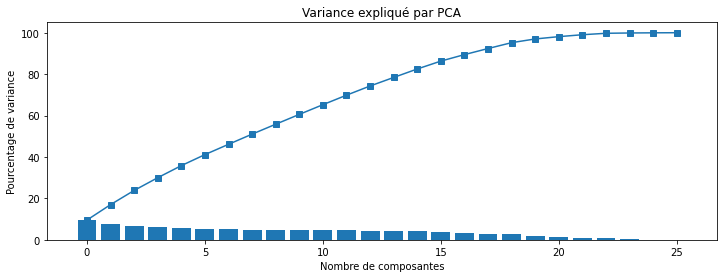

In [414]:
# Représentation graphique
fig = plt.figure(1, figsize = (12, 4))
plt.bar(range(len(pca.explained_variance_ratio_)), 100*pca.explained_variance_ratio_)
plt.ylim(0, 1.05*100)
plt.plot(range(len(pca.explained_variance_ratio_)), 100*np.cumsum(pca.explained_variance_ratio_), 's-')
plt.ylabel('Pourcentage de variance')
plt.xlabel('Nombre de composantes')
plt.title('Variance expliqué par PCA')
plt.show()

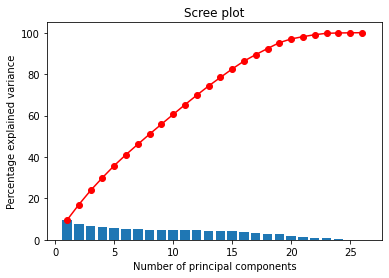

In [415]:
# Faire un scree plot

def display_scree_plot(pca):
    '''Display a scree plot for the pca'''

    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(), c = "red", marker = 'o')
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    plt.title("Scree plot")
    plt.show(block = False)
    
display_scree_plot(pca)  

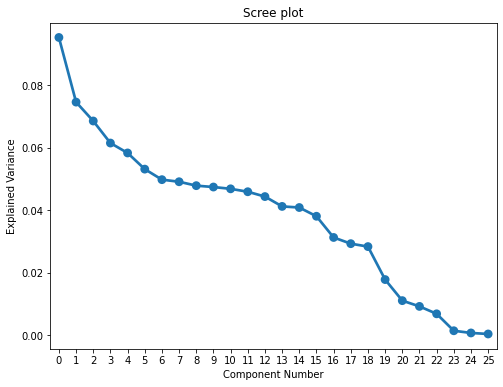

In [417]:
# Scree plot
# ( = line plot of the eigenvalues of factors or principal components in an analysis)

ind = np.arange(0, 26)
(fig, ax) = plt.subplots(figsize = (8, 6))
sns.pointplot(x = ind, y = pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

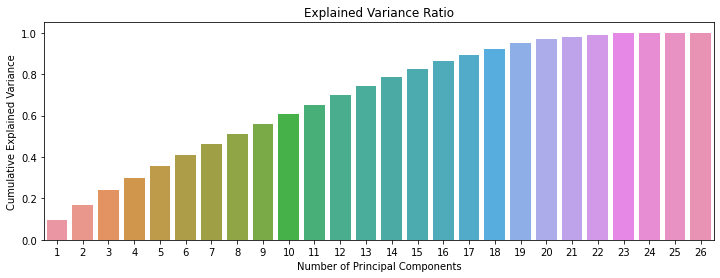

In [418]:
# autre représentation de la variance expliquée :
plt.figure(figsize = (12, 4))
sns.barplot(x = np.arange(1, len(pca.explained_variance_ratio_) + 1),
            y = np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

In [419]:
pca.explained_variance_ratio_

array([0.09523335, 0.07457741, 0.0685389 , 0.06149214, 0.05832579,
       0.05315926, 0.04979082, 0.04912582, 0.04787349, 0.0474373 ,
       0.04686231, 0.04593021, 0.04438585, 0.04124078, 0.04088835,
       0.03809569, 0.03131902, 0.02933547, 0.02840023, 0.01786304,
       0.01113099, 0.00928966, 0.0069184 , 0.00150572, 0.00080423,
       0.00047576])

In [420]:
# Test en ne gardant que 2 dimensions :

pca = PCA(n_components = 2)
df_pca = pca.fit_transform(df)

In [421]:
print('Explained variance regarding first dimension : ' + '{:.1%}'.format(pca.explained_variance_ratio_[0]))
print('Explained variance regarding second dimension : ' + '{:.1%}'.format(pca.explained_variance_ratio_[1]))
print('Total variance included in those 2 dimensions : ' + '{:.1%}'.format(pca.explained_variance_ratio_.sum()))

Explained variance regarding first dimension : 9.5%
Explained variance regarding second dimension : 7.5%
Total variance included in those 2 dimensions : 17.0%


In [422]:
# Test en conservant 90% de la variance

pca_90 = PCA(n_components = 0.90)  # 90% de la variance
df_pca_90 = pca_90.fit_transform(df)

# Mise sous forme de DataFrame
df_pca_90 = pd.DataFrame(df_pca_90, columns = ['Composante_' + str(i) for i in range(df_pca_90.shape[1])])
df_pca_90.shape

(88847, 18)

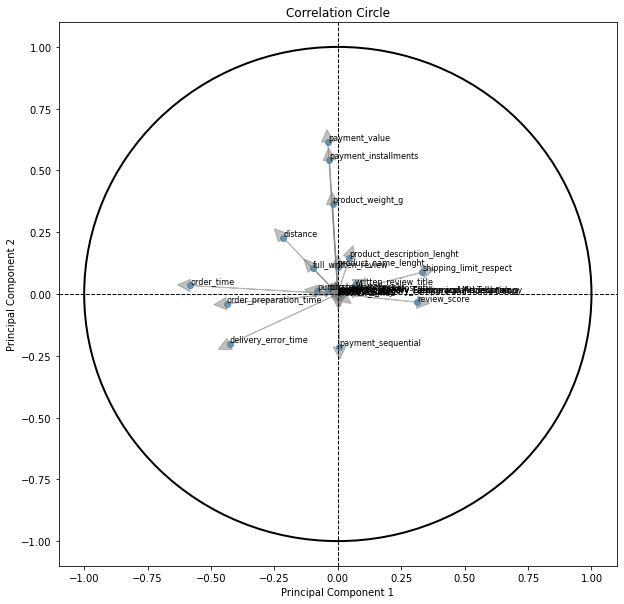

In [423]:
# Plot the correlation circle

def plot_correlation_circle(pca, features, dimensions = (0, 1), scale_factor = 1):
    num_features = len(features)
    num_principal_components = pca.components_.shape[0]

    if dimensions[0] >= num_principal_components or dimensions[1] >= num_principal_components:
        raise ValueError('Invalid dimensions. Ensure that dimensions are within the range of available principal components.')

    plt.figure(figsize = (10, 10))

    # Scatter plot (avec transparence)
    plt.scatter(pca.components_[dimensions[0], :],
                pca.components_[dimensions[1], :],
                alpha = 0.7)

    # Plot arrows
    for i in range(num_features):
        plt.arrow(0,
                  0,
                  pca.components_[dimensions[0], i],
                  pca.components_[dimensions[1], i],
                  head_width = 0.05,
                  head_length = 0.05,
                  fc = 'grey',
                  ec = 'grey',
                  alpha = 0.5)

        plt.text(pca.components_[dimensions[0], i] * scale_factor,
                 pca.components_[dimensions[1], i] * scale_factor,
                 features[i],
                 ha = 'left',
                 va = 'bottom',
                 fontsize = 8)

    # Add circle patch
    ellipse = Ellipse((0, 0),
                      2,
                      2,
                      edgecolor = 'black',
                      facecolor = 'none',
                      linewidth = 2)
    plt.gca().add_patch(ellipse)

    # Add reference lines
    plt.axhline(0, color = 'black', linestyle = '--', linewidth = 1)
    plt.axvline(0, color = 'black', linestyle = '--', linewidth = 1)

    # Set axis labels
    plt.xlabel(f'Principal Component {dimensions[0] + 1}')
    plt.ylabel(f'Principal Component {dimensions[1] + 1}')

    # Set plot title
    plt.title('Correlation Circle')

# Plot correlation circle using the first two principal components
plot_correlation_circle(pca_90, features = df.columns, dimensions = (0, 1))

plt.show()

In [424]:
# Cercle des correlations : 

# cercle de rayon 1
# axe horizontal = composante principale 1
# axe vertical = composante principale 2

# longueur des flèches = représente à quel point la variance de la variable est expliquée dans ce plan factoriel
# angle entre les flèches = indication de si les variables sont corrélées entre elles sur ce plan ou non
# etc : petit angle -> correlation positive dans ce plan
# angle de 90° -> pas de correlation
# angle de 180° -> correlation negative

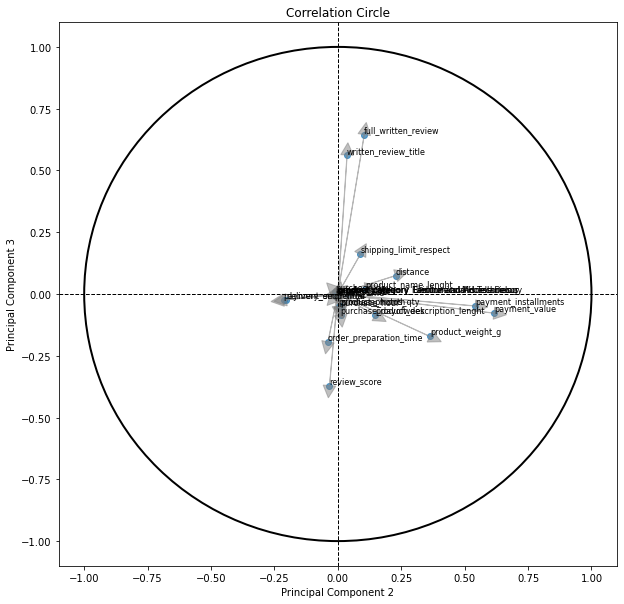

In [425]:
# autres plans factoriels : 
plot_correlation_circle(pca_90, features = df.columns, dimensions = (1, 2))

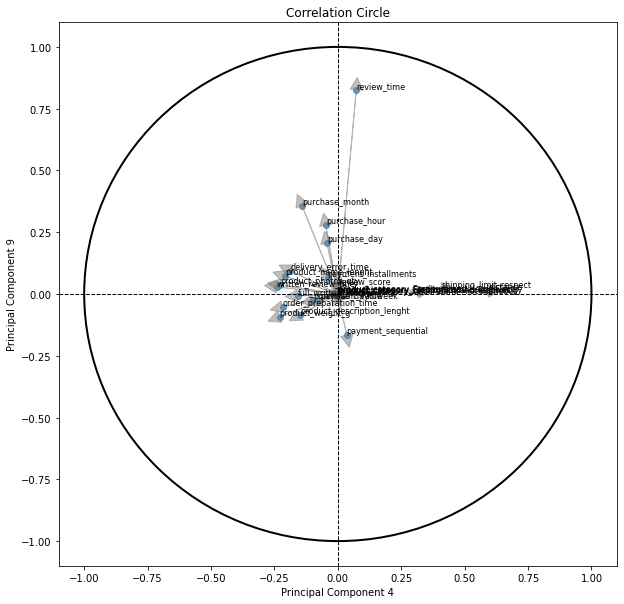

In [426]:
plot_correlation_circle(pca_90, features = df.columns, dimensions = (3, 8))

In [ ]:
# à tester :
"""
# https://rasbt.github.io/mlxtend/user_guide/plotting/plot_pca_correlation_graph/

from mlxtend.plotting import plot_pca_correlation_graph

X, y = df_pca

X_norm = X / X.std(axis=0) # Normalizing the feature columns is recommended

feature_names = [
  'sepal length',
  'sepal width',
  'petal length',
  'petal width']

figure, correlation_matrix = plot_pca_correlation_graph(X_norm,
                                                        feature_names,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=10)

correlation_matrix"""

In [ ]:
# https://nirpyresearch.com/pca-correlation-circle/
# regarder ça, super interessant

## Export du jeu de données final

In [427]:
# Export données 'propres' au format pickle

# Chemin d'accès aux données (à modifier si code en local)
#path = '/content/drive/MyDrive/OpenClassrooms/Projet5/' #-> pour colab
path = '' #-> en local

# specifier le chemin choisi
filepath = os.path.join(path, 'df')

# exporter en format pickle
with open(filepath, 'wb') as f:
    pickle.dump(df, f)